# **Phase 2: Week 2 - Clustering Algorithm Selection and Data Transformation**

Objectives:
● Algorithm Selection
● Feature Selection
● Data Scaling
● Dimensionality Reduction


After EDA and Data Preprocessing, Week 2 involves clustering with feature selection, data scaling and dimensionality reduction to arrive at the best algorithm for customer segmentation

In [3]:
# load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the Train dataset
dtrain=pd.read_csv('/content/Train.csv')

In [3]:
dtrain.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [4]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [5]:
dtrain.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [6]:
# dropping unique IDs as it is not relevant
dtrain.drop('id',axis=1,inplace=True)

In [7]:
dtrain.duplicated().sum()

0

In [8]:
dtrain.isnull().sum()/len(dtrain)*100

customer_age                         1.955952
job_type                             0.000000
marital                              0.473979
education                            0.000000
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
term_deposit_subscribed              0.000000
dtype: float64

81% missing values are there in days since prev campaign, will drop the column

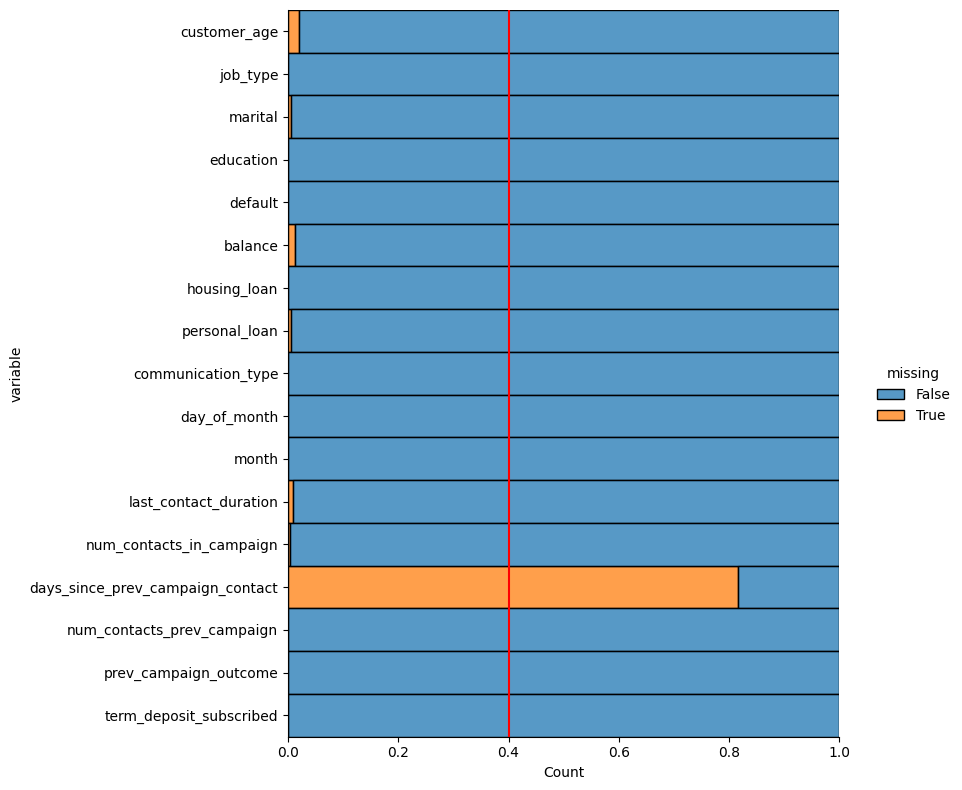

In [9]:
sns.displot(
    data=dtrain.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

plot to check the correlation among missing values

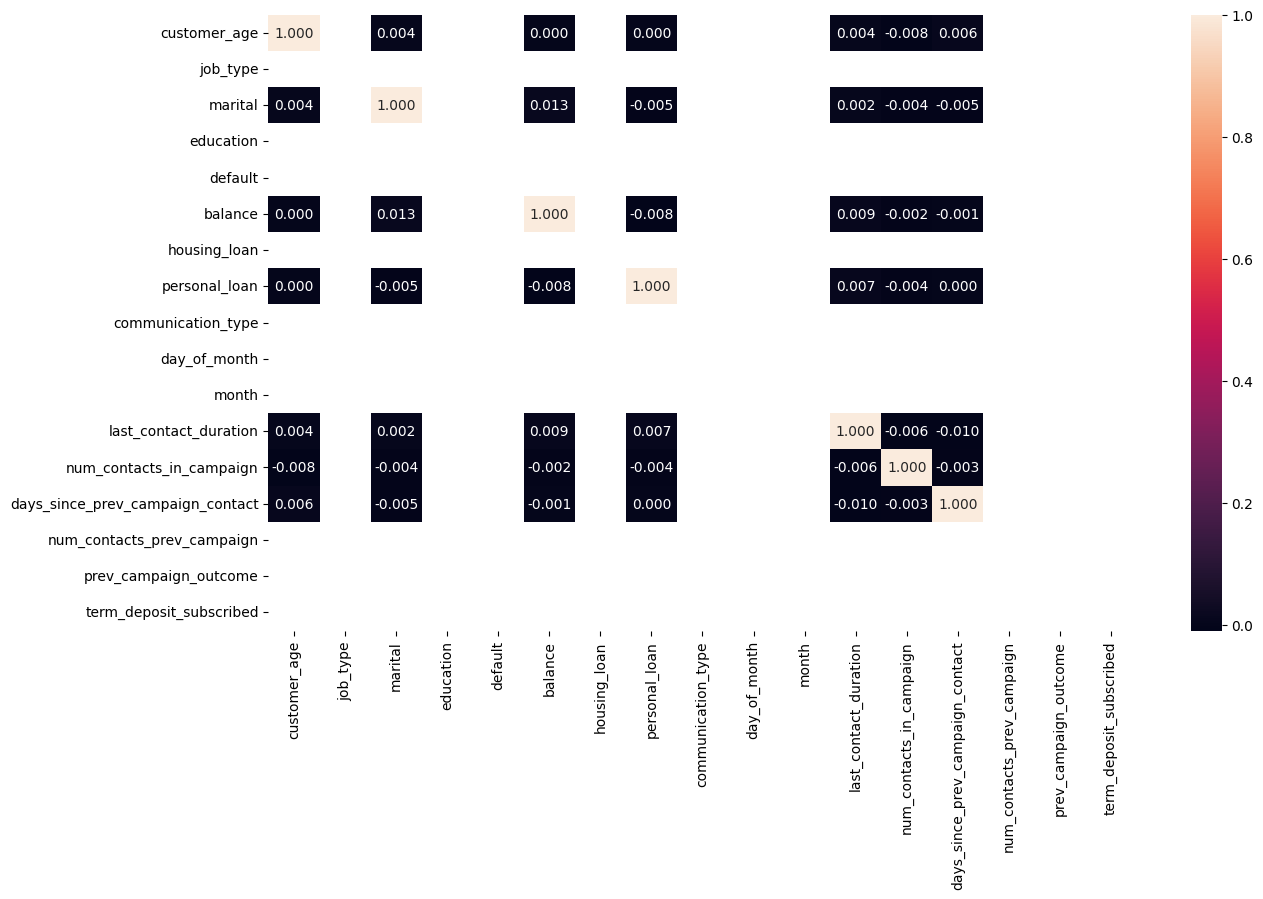

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(dtrain.isnull().corr(),annot=True,fmt='0.3f')
plt.show()

very low correlation among missing values

In [11]:
dtrain.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

Very low missing values and hence can either drop them or impute using median/mode, will impute inorder to retain data and also since the percentage of missing values is very low

In [12]:
dtrain['customer_age']=dtrain['customer_age'].fillna(dtrain['customer_age'].median())
dtrain['marital']=dtrain['marital'].fillna(dtrain['marital'].mode()[0])
dtrain['balance']=dtrain['balance'].fillna(dtrain['balance'].median())
dtrain['personal_loan']=dtrain['personal_loan'].fillna(dtrain['personal_loan'].mode()[0])
dtrain['last_contact_duration']=dtrain['last_contact_duration'].fillna(dtrain['last_contact_duration'].median())
dtrain['num_contacts_in_campaign']=dtrain['num_contacts_in_campaign'].fillna(dtrain['num_contacts_in_campaign'].median())

In [13]:
numerical=dtrain.select_dtypes(include=np.number)
numerical.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed'],
      dtype='object')

In [14]:
numerical

customer_age  balance  day_of_month  last_contact_duration  \
0              28.0    285.0            26                  303.0   
1              34.0    934.0            18                  143.0   
2              46.0    656.0             5                  101.0   
3              34.0      2.0            20                  127.0   
4              41.0   1352.0            13                   49.0   
...             ...      ...           ...                    ...   
31642          58.0    567.0             2                   99.0   
31643          51.0   1072.0            20                   31.0   
31644          41.0    242.0            23                   89.0   
31645          48.0   2699.0            11                  216.0   
31646          38.0   1045.0            18                  183.0   

       num_contacts_in_campaign  num_contacts_prev_campaign  \
0                           4.0                           0   
1                           2.0                           1   
2                           4.0                           0   
3                           3.0                           0   
4                           2.0                           0   
...                         ...                         ...   
31642                       2.0                           3   
31643                       7.0                           0   
31644                       2.0                           0   
31645                       6.0                           0   
31646                      10.0                           0   

       term_deposit_subscribed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
31642                        0  
31643                        0  
31644                        0  
31645                        0  
31646                        0  

[31647 rows x 7 columns]

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numerical.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical.values, i)
                          for i in range(len(numerical.columns))]

print(vif_data)

                      feature       VIF
0                customer_age  4.835945
1                     balance  1.211454
2                day_of_month  3.962812
3       last_contact_duration  2.287216
4    num_contacts_in_campaign  1.806592
5  num_contacts_prev_campaign  1.062155
6     term_deposit_subscribed  1.369167


VIF shows there is no high multicollinearity among the numerical features in the dataset.

In [16]:
numerical.corr()

customer_age   balance  day_of_month  \
customer_age                    1.000000  0.101952     -0.012598   
balance                         0.101952  1.000000      0.001763   
day_of_month                   -0.012598  0.001763      1.000000   
last_contact_duration          -0.006674  0.016436     -0.034422   
num_contacts_in_campaign        0.005907 -0.020767      0.164792   
num_contacts_prev_campaign     -0.001395  0.011506     -0.050596   
term_deposit_subscribed         0.031045  0.052029     -0.026898   

                            last_contact_duration  num_contacts_in_campaign  \
customer_age                            -0.006674                  0.005907   
balance                                  0.016436                 -0.020767   
day_of_month                            -0.034422                  0.164792   
last_contact_duration                    1.000000                 -0.085815   
num_contacts_in_campaign                -0.085815                  1.000000   
num_contacts_prev_campaign               0.004889                 -0.033191   
term_deposit_subscribed                  0.414666                 -0.070574   

                            num_contacts_prev_campaign  \
customer_age                                 -0.001395   
balance                                       0.011506   
day_of_month                                 -0.050596   
last_contact_duration                         0.004889   
num_contacts_in_campaign                     -0.033191   
num_contacts_prev_campaign                    1.000000   
term_deposit_subscribed                       0.089881   

                            term_deposit_subscribed  
customer_age                               0.031045  
balance                                    0.052029  
day_of_month                              -0.026898  
last_contact_duration                      0.414666  
num_contacts_in_campaign                  -0.070574  
num_contacts_prev_campaign                 0.089881  
term_deposit_subscribed                    1.000000

the above correlation table also shows the correlation coefficient is very low.

In [17]:
num_cols=[['customer_age','balance','day_of_month','last_contact_duration','num_contacts_in_campaign','num_contacts_in_prev_campaign']]

To check for statistical significance

In [18]:
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
p_val = []
sig = []
for i in dtrain.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(dtrain[dtrain['term_deposit_subscribed'] == 0][i], dtrain[dtrain['term_deposit_subscribed'] == 1][i])
    else:
        ct = pd.crosstab(dtrain[i], dtrain['term_deposit_subscribed'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : dtrain.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

columns        p_value significance
10                       month   0.000000e+00  Significant
11       last_contact_duration   0.000000e+00  Significant
14       prev_campaign_outcome   0.000000e+00  Significant
15     term_deposit_subscribed   0.000000e+00  Significant
13  num_contacts_prev_campaign  4.480648e-200  Significant
0                 customer_age  2.413992e-175  Significant
8           communication_type  6.267977e-150  Significant
6                 housing_loan  7.997538e-146  Significant
1                     job_type  9.976017e-121  Significant
9                 day_of_month   5.752419e-65  Significant
3                    education   4.678150e-36  Significant
5                      balance   3.562069e-35  Significant
7                personal_loan   1.339737e-31  Significant
2                      marital   3.022306e-29  Significant
12    num_contacts_in_campaign   3.873445e-28  Significant
4                      default   5.830453e-04  Significant

all are significant features as per Chi-square and Anova one way tests

In [20]:
dtrain['term_deposit_subscribed'].value_counts()/len(dtrain)*100

term_deposit_subscribed
0    89.275445
1    10.724555
Name: count, dtype: float64

The dataset has 89% of customer who have not subscribed to Term Deposits

# Feature selection

Using SelectKBest method to check the best features among numerical variables

In [41]:
from sklearn.feature_selection import SelectKBest,chi2
X = numerical.iloc[:,:-1]
y = numerical.iloc[:,-1]

X, y are taken without the target variable

In [42]:
X.head()

customer_age  balance  day_of_month  last_contact_duration  \
0          28.0    285.0            26                  303.0   
1          34.0    934.0            18                  143.0   
2          46.0    656.0             5                  101.0   
3          34.0      2.0            20                  127.0   
4          41.0   1352.0            13                   49.0   

   num_contacts_in_campaign  num_contacts_prev_campaign  
0                       4.0                           0  
1                       2.0                           1  
2                       4.0                           0  
3                       3.0                           0  
4                       2.0                           0

In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: term_deposit_subscribed, dtype: int64

drop balance since it has negative values and selectkbest doesnt work well with negative data

In [44]:
X.drop('balance',axis=1,inplace=True)

In [45]:
bestfeature = SelectKBest(score_func=chi2, k='all')
bf = bestfeature.fit(X,y)

In [46]:
score = pd.DataFrame(bf.scores_)
colnames = pd.DataFrame(X.columns)
bf_result = pd.concat([colnames, score], axis='columns')
bf_result.columns = ['Feature','Score']
bf_result.nlargest(5,'Score')

Feature         Score
2       last_contact_duration  1.385624e+06
4  num_contacts_prev_campaign  2.700070e+03
3    num_contacts_in_campaign  5.631276e+02
1                day_of_month  1.002647e+02
0                customer_age  8.556556e+01

all numerical features are good in terms of scores, the above result shows the order of importance among the features.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
rf.feature_importances_

array([0.21282486, 0.17992574, 0.48011872, 0.05682349, 0.07030718])

<Axes: >

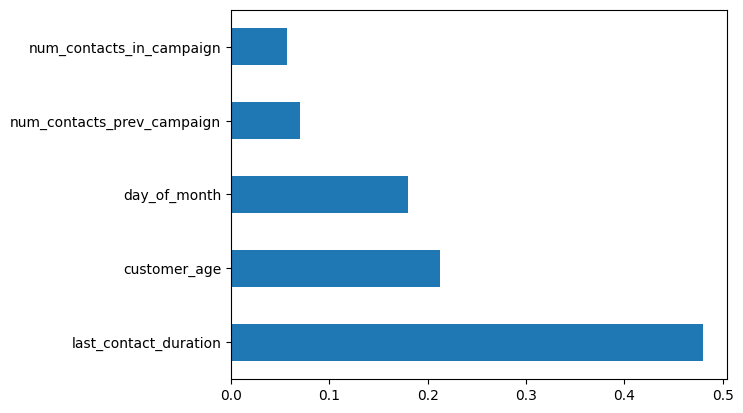

In [30]:
rf_feature = pd.Series(rf.feature_importances_, index=X.columns)
rf_feature.nlargest(20).plot(kind='barh')

**last contact duration** is shown as a feature of more importance among other numerical features

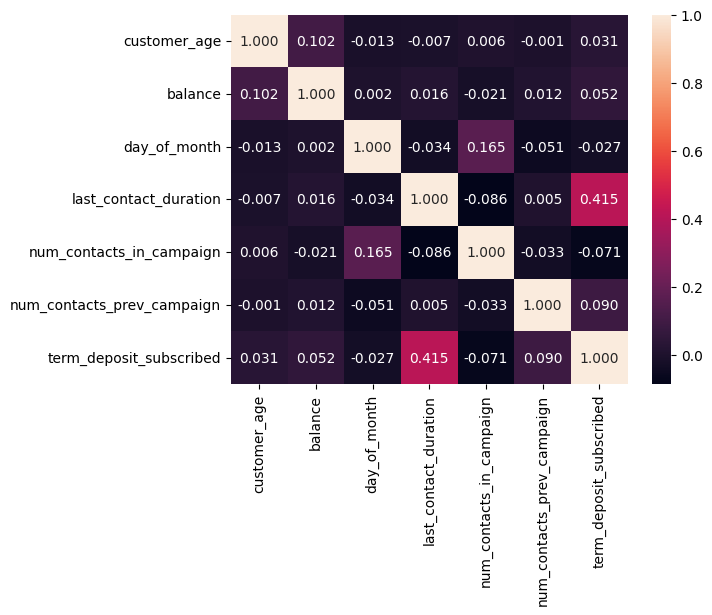

In [47]:
sns.heatmap(numerical.corr(),annot=True,fmt='0.3f')
plt.show()

**positive correlation between term deposit subscription and last contact duration of 0.415**

Among the clustering models, DBSCAN works well with outliers. Hence will first check using DBSCAN for clusters.

Will use Robust Scaler to normalize the features. Will remove target variable for the clustering. Encode the categorical variables by first reducing the categories and then encode using One hot encoder.

In [48]:
dtrain['job_type']=dtrain['job_type'].replace({'blue-collar':'professional','management':'professional','technician':'service','admin.':'service','services':'service',
                                 'self-employed':'entrepreneur','housemaid':'unemployed','student':'unemployed','retired':'unemployed','unknown':'unemployed'})

reduced the job type to 4 categories

In [49]:
dtrain['job_type'].value_counts()

job_type
professional    13482
service         11770
unemployed       4247
entrepreneur     2148
Name: count, dtype: int64

In [50]:
dtrain['month']=dtrain['month'].replace({'jan':'Q1','feb':'Q1','mar':'Q1','apr':'Q2','may':'Q2','jun':'Q2','jul':'Q3','aug':'Q3','sep':'Q3','oct':'Q4','nov':'Q4','dec':'Q4'})

reduced the months to 4 quarters

In [51]:
dtrain['month'].value_counts()

month
Q2    15542
Q3     9511
Q4     3467
Q1     3127
Name: count, dtype: int64

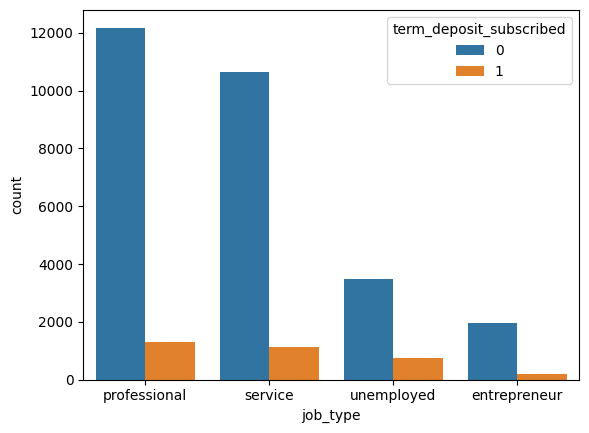

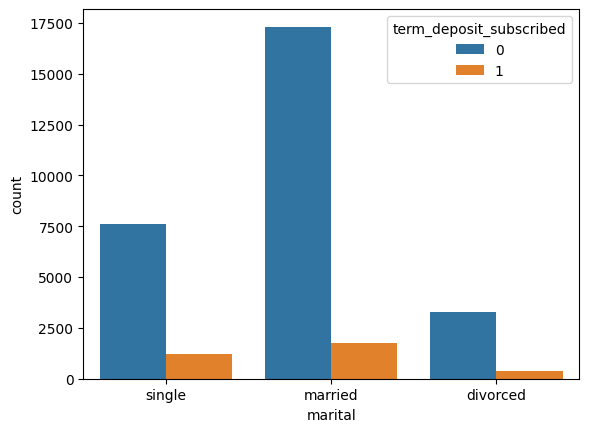

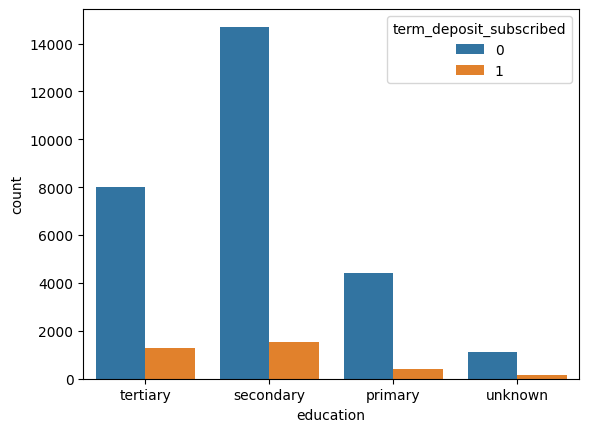

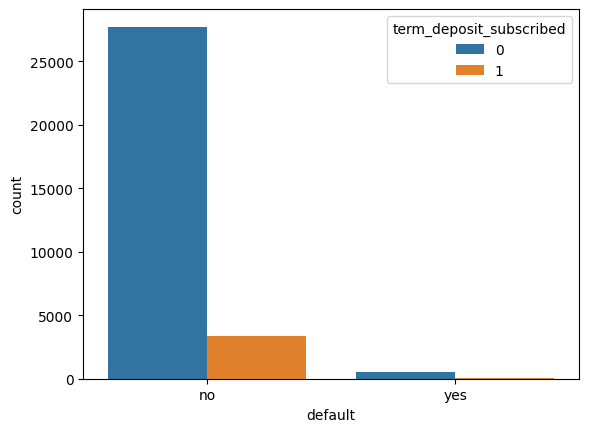

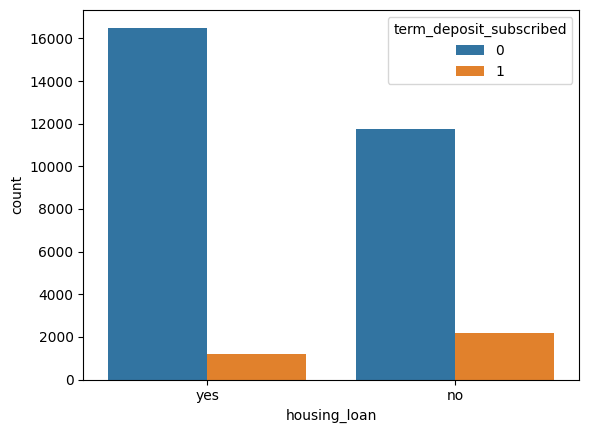

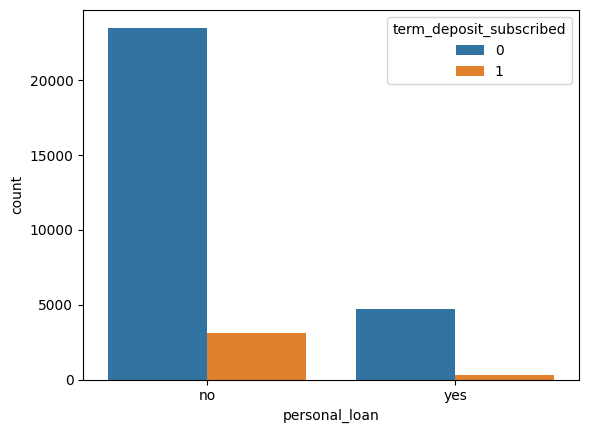

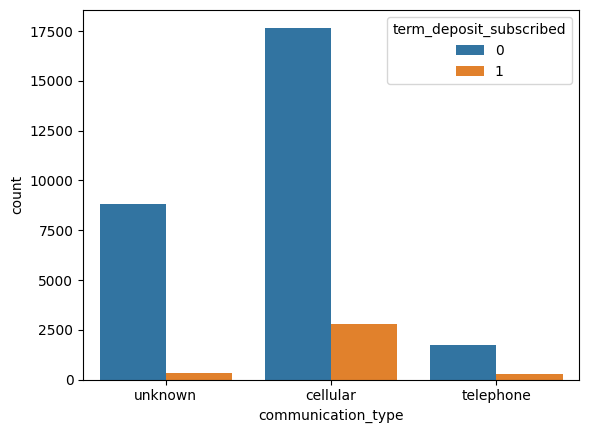

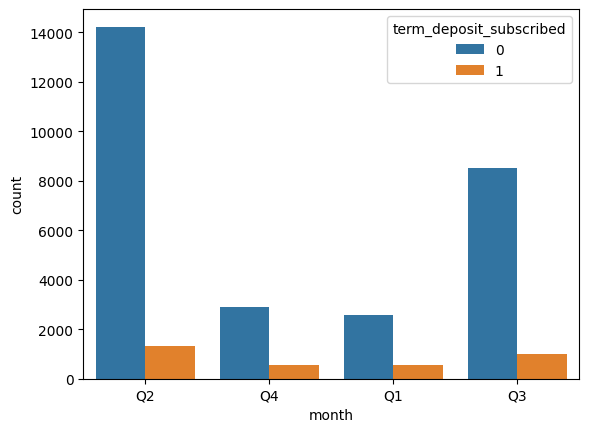

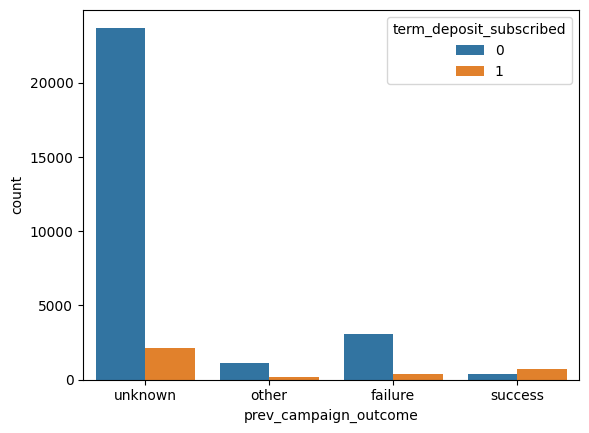

In [52]:
for i in dtrain.columns:
  if dtrain[i].dtype=='object':
    sns.countplot(x=i,data=dtrain,hue='term_deposit_subscribed')
    plt.show()

**One Hot encoding for categorical variables**

In [53]:
X=pd.get_dummies(dtrain,dtype=int)

In [54]:
X.head()

customer_age  balance  day_of_month  last_contact_duration  \
0          28.0    285.0            26                  303.0   
1          34.0    934.0            18                  143.0   
2          46.0    656.0             5                  101.0   
3          34.0      2.0            20                  127.0   
4          41.0   1352.0            13                   49.0   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                       4.0                           0   
1                       2.0                           1   
2                       4.0                           0   
3                       3.0                           0   
4                       2.0                           0   

   term_deposit_subscribed  job_type_entrepreneur  job_type_professional  \
0                        0                      0                      1   
1                        0                      0                      1   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      1   

   job_type_service  ...  communication_type_telephone  \
0                 0  ...                             0   
1                 0  ...                             0   
2                 1  ...                             0   
3                 1  ...                             0   
4                 0  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           1         0         1         0         0   
1                           0         0         0         0         1   
2                           0         1         0         0         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              0  
2                              0                              1  
3                              0                              1  
4                              0                              1  

[5 rows x 35 columns]

the columns have increased to 35

drop the target column

In [55]:
Xtrain=X.drop('term_deposit_subscribed',axis=1)

In [56]:
Xtrain.head()

customer_age  balance  day_of_month  last_contact_duration  \
0          28.0    285.0            26                  303.0   
1          34.0    934.0            18                  143.0   
2          46.0    656.0             5                  101.0   
3          34.0      2.0            20                  127.0   
4          41.0   1352.0            13                   49.0   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                       4.0                           0   
1                       2.0                           1   
2                       4.0                           0   
3                       3.0                           0   
4                       2.0                           0   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                      0                      1                 0   
1                      0                      1                 0   
2                      0                      0                 1   
3                      0                      0                 1   
4                      0                      1                 0   

   job_type_unemployed  ...  communication_type_telephone  \
0                    0  ...                             0   
1                    0  ...                             0   
2                    0  ...                             0   
3                    0  ...                             0   
4                    0  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           1         0         1         0         0   
1                           0         0         0         0         1   
2                           0         1         0         0         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              0  
2                              0                              1  
3                              0                              1  
4                              0                              1  

[5 rows x 34 columns]

**Using Robust Scaler** - RobustScaler is designed to be resistant to the influence of outliers in the data.

In [57]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
X_rs=pd.DataFrame(RS.fit_transform(Xtrain),columns=Xtrain.columns)

In [58]:
X_rs.head()

customer_age   balance  day_of_month  last_contact_duration  \
0       -0.6875 -0.124337      0.769231               0.590476   
1       -0.3125  0.367703      0.153846              -0.171429   
2        0.4375  0.156937     -0.846154              -0.371429   
3       -0.3125 -0.338893      0.307692              -0.247619   
4        0.1250  0.684610     -0.230769              -0.619048   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                       1.0                         0.0   
1                       0.0                         1.0   
2                       1.0                         0.0   
3                       0.5                         0.0   
4                       0.0                         0.0   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                    0.0                    1.0               0.0   
1                    0.0                    1.0               0.0   
2                    0.0                    0.0               1.0   
3                    0.0                    0.0               1.0   
4                    0.0                    1.0               0.0   

   job_type_unemployed  ...  communication_type_telephone  \
0                  0.0  ...                           0.0   
1                  0.0  ...                           0.0   
2                  0.0  ...                           0.0   
3                  0.0  ...                           0.0   
4                  0.0  ...                           0.0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                         1.0       0.0       1.0       0.0       0.0   
1                         0.0       0.0       0.0       0.0       1.0   
2                         0.0       1.0       0.0       0.0       0.0   
3                         1.0       0.0       1.0       0.0       0.0   
4                         0.0       0.0       1.0       0.0       0.0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                            0.0                          0.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                            0.0                            0.0  
1                            0.0                           -1.0  
2                            0.0                            0.0  
3                            0.0                            0.0  
4                            0.0                            0.0  

[5 rows x 34 columns]

After scaling, will check the clusters in DBSCAN

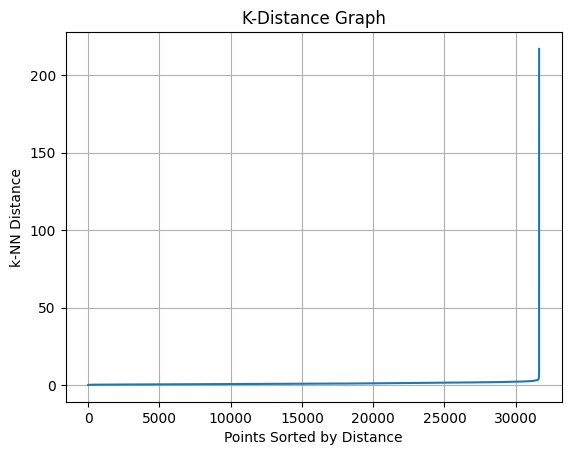

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=34)
model = knn.fit(X_rs)
distances, indices = knn.kneighbors(X_rs)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(axis='both')
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

epsilon distance from the above graph is close to 0.

In [73]:
db = DBSCAN(eps=1.5, min_samples=35).fit(X_rs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  2
Number of Outliers :  15636


After many iterations, Epsilon value of 1.5 with min samples 35(which is the number of features + 1) resulted in 2 clusters and 15636 outliers. This is not a suitable result. Epsilon value of 2 and above gave only 1 cluster.

In [74]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_rs, labels)
print(score)

-0.05644569978421167


above score is a poor representation of clusters. Will now use PCA to arrive at better clustering.

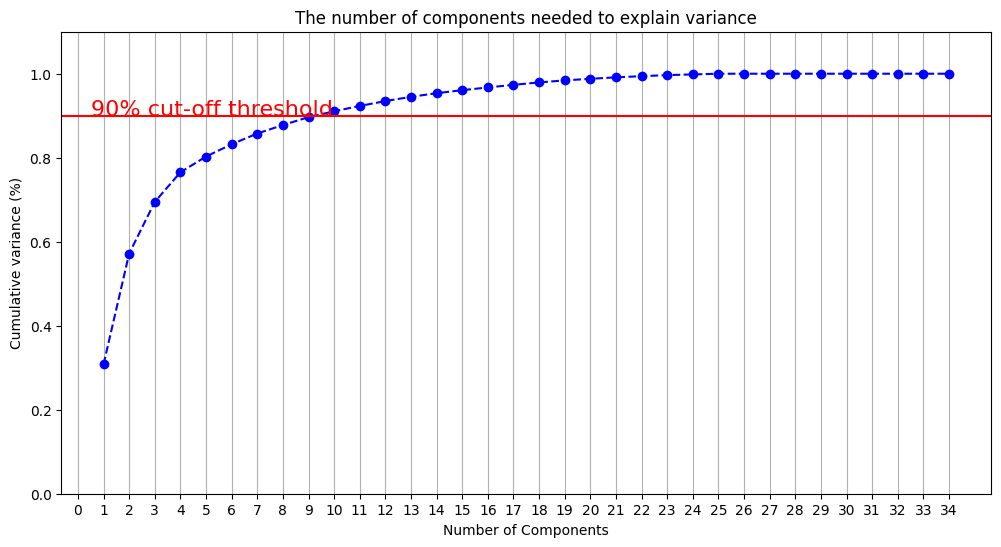

In [75]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_rs)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 35, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

optimum number of 8 components with PCA below the threshold of 0.9 variance

In [76]:
pca=PCA(n_components=8)
pca.fit(X_rs)
x_pca=pca.transform(X_rs)

n_neighbors as 16 ( twice the number of features)

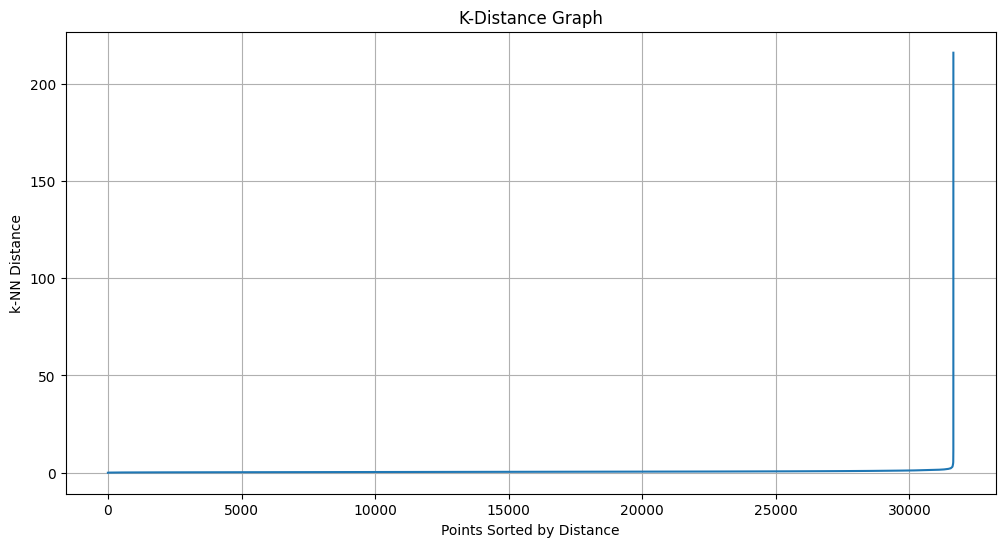

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors =16)
model = knn.fit(x_pca)
distances, indices = knn.kneighbors(x_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

After iterations, using Epsilon value as 3 and min samples as 8- number of components

In [82]:
db = DBSCAN(eps=3, min_samples=8).fit(x_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  2
Number of Outliers :  74


data has given 2 clustes and 74 outliers.

In [83]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_pca, labels)
print(score)

0.8336359201981718


DBSCAN with PCA has given a score of 0.8336

In [84]:
labelss=pd.DataFrame(labels)
labelss.value_counts()

 0    31562
-1       74
 1       11
Name: count, dtype: int64

In [85]:
dtrain['labels']=labelss

In [86]:
dtrain['labels'].value_counts()

labels
 0    31562
-1       74
 1       11
Name: count, dtype: int64

In [88]:
dtrain[dtrain['labels']==1]

customer_age      job_type   marital  education default  balance  \
1696           39.0       service   married   tertiary      no    193.0   
5077           33.0  professional   married  secondary      no    665.0   
8393           30.0  professional   married    unknown      no     67.0   
18260          39.0  professional  divorced   tertiary      no    151.0   
19625          37.0  professional   married    primary      no    471.0   
20500          37.0  professional   married  secondary      no    305.0   
20532          54.0  professional   married   tertiary      no    717.0   
24597          35.0  professional   married   tertiary      no    711.0   
29184          42.0  professional   married    primary      no    713.0   
30342          55.0       service   married  secondary      no   1550.0   
30636          28.0       service   married   tertiary      no    701.0   

      housing_loan personal_loan communication_type  day_of_month month  \
1696            no            no           cellular             4    Q1   
5077           yes            no           cellular            14    Q2   
8393           yes            no           cellular             5    Q1   
18260          yes            no           cellular            20    Q4   
19625          yes            no           cellular            12    Q2   
20500          yes            no           cellular            18    Q2   
20532          yes            no          telephone            11    Q2   
24597          yes            no           cellular            21    Q4   
29184          yes            no           cellular            18    Q2   
30342          yes           yes           cellular             6    Q1   
30636           no           yes           cellular            29    Q1   

       last_contact_duration  num_contacts_in_campaign  \
1696                    26.0                       7.0   
5077                     2.0                       5.0   
8393                   179.0                       2.0   
18260                   38.0                       6.0   
19625                   25.0                       5.0   
20500                    0.0                       7.0   
20532                  239.0                       6.0   
24597                  337.0                       4.0   
29184                   10.0                       6.0   
30342                    2.0                       6.0   
30636                  147.0                       3.0   

       num_contacts_prev_campaign prev_campaign_outcome  \
1696                           24                 other   
5077                           27                 other   
8393                           27                 other   
18260                          26               failure   
19625                          30                 other   
20500                          25               failure   
20532                          29                 other   
24597                          27               failure   
29184                          28               failure   
30342                          27                 other   
30636                          29               failure   

       term_deposit_subscribed  labels  
1696                         0       1  
5077                         0       1  
8393                         0       1  
18260                        0       1  
19625                        0       1  
20500                        0       1  
20532                        0       1  
24597                        0       1  
29184                        0       1  
30342                        0       1  
30636                        0       1

In [87]:
import plotly.express as px
px.scatter_3d(data_frame=dtrain,x='customer_age',y='balance',z='last_contact_duration',color='labels',template='plotly_dark',
             title='3D Scatter plot for DBSCAN Clusters')

In [91]:
import plotly.express as px

fig = px.scatter(dtrain, x="customer_age", y="last_contact_duration", hover_name ='job_type', color = "labels", size_max=60)
fig.update_layout(
     height=800)
fig.show()

**Before applying the other clustering methods, will treat the outliers for better results, as Kmeans and Hierarchical Clustering are sensitive to outliers**

In [92]:
dtrain.head()

customer_age      job_type  marital  education default  balance  \
0          28.0  professional   single   tertiary      no    285.0   
1          34.0  professional  married  secondary      no    934.0   
2          46.0       service  married  secondary      no    656.0   
3          34.0       service   single  secondary      no      2.0   
4          41.0  professional  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26    Q2   
1           no           yes           cellular            18    Q4   
2           no            no           cellular             5    Q1   
3          yes            no            unknown            20    Q2   
4          yes            no           cellular            13    Q2   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   num_contacts_prev_campaign prev_campaign_outcome  term_deposit_subscribed  \
0                           0               unknown                        0   
1                           1                 other                        0   
2                           0               unknown                        0   
3                           0               unknown                        0   
4                           0               unknown                        0   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0

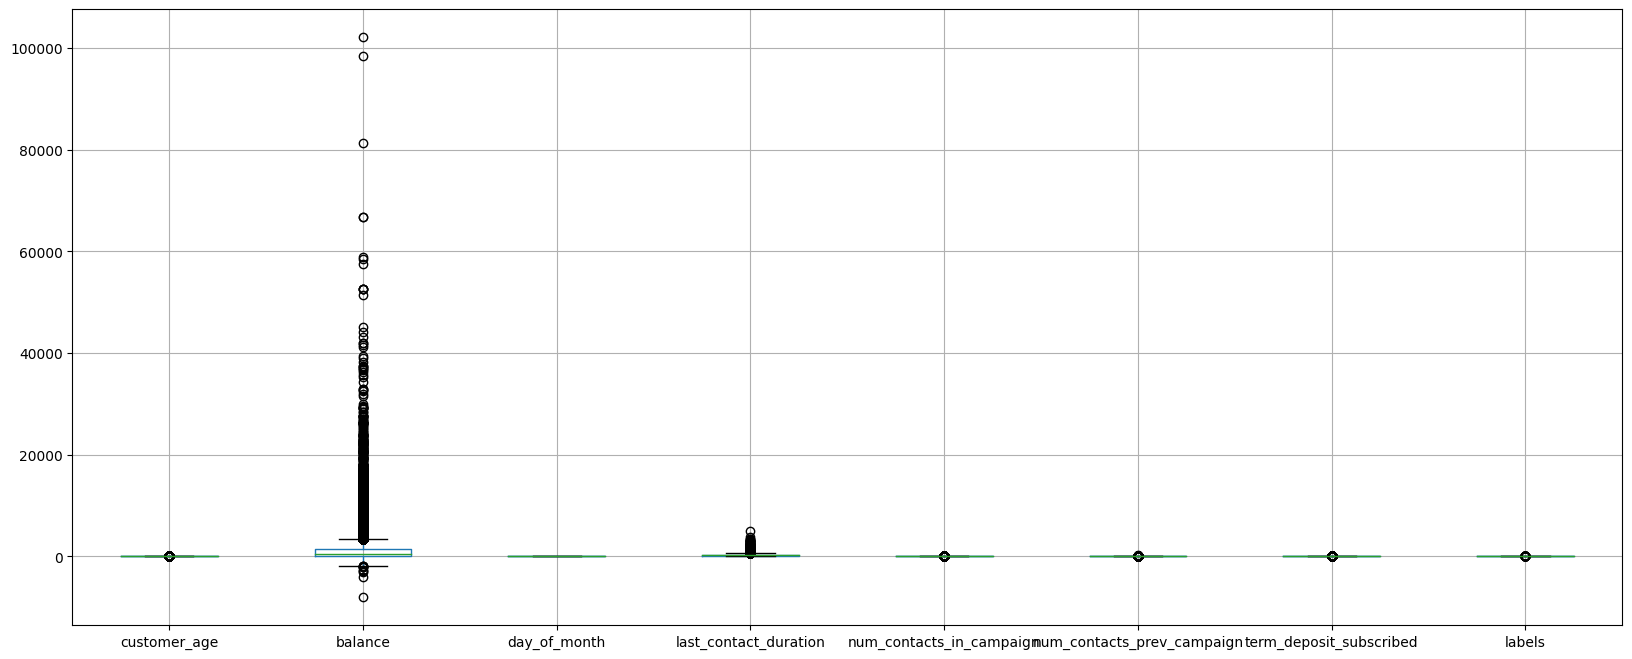

In [93]:
dtrain.boxplot(figsize=(20,8))
plt.show()

The **Yeo Johnson transformer** is used when there are negative values. Will use this transformer to bring a normal distribution

In [94]:
numC=['customer_age','balance','day_of_month','last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign']

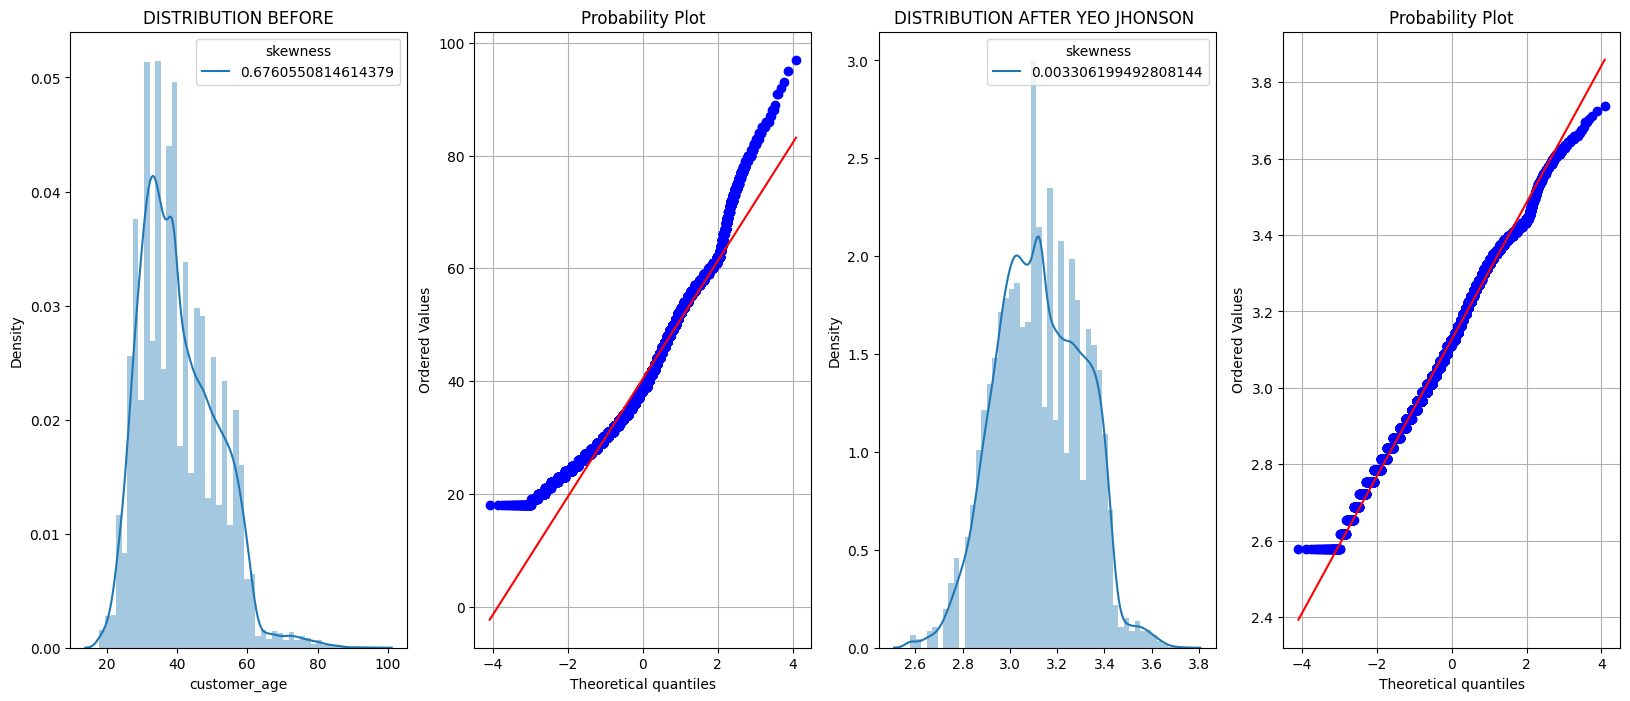

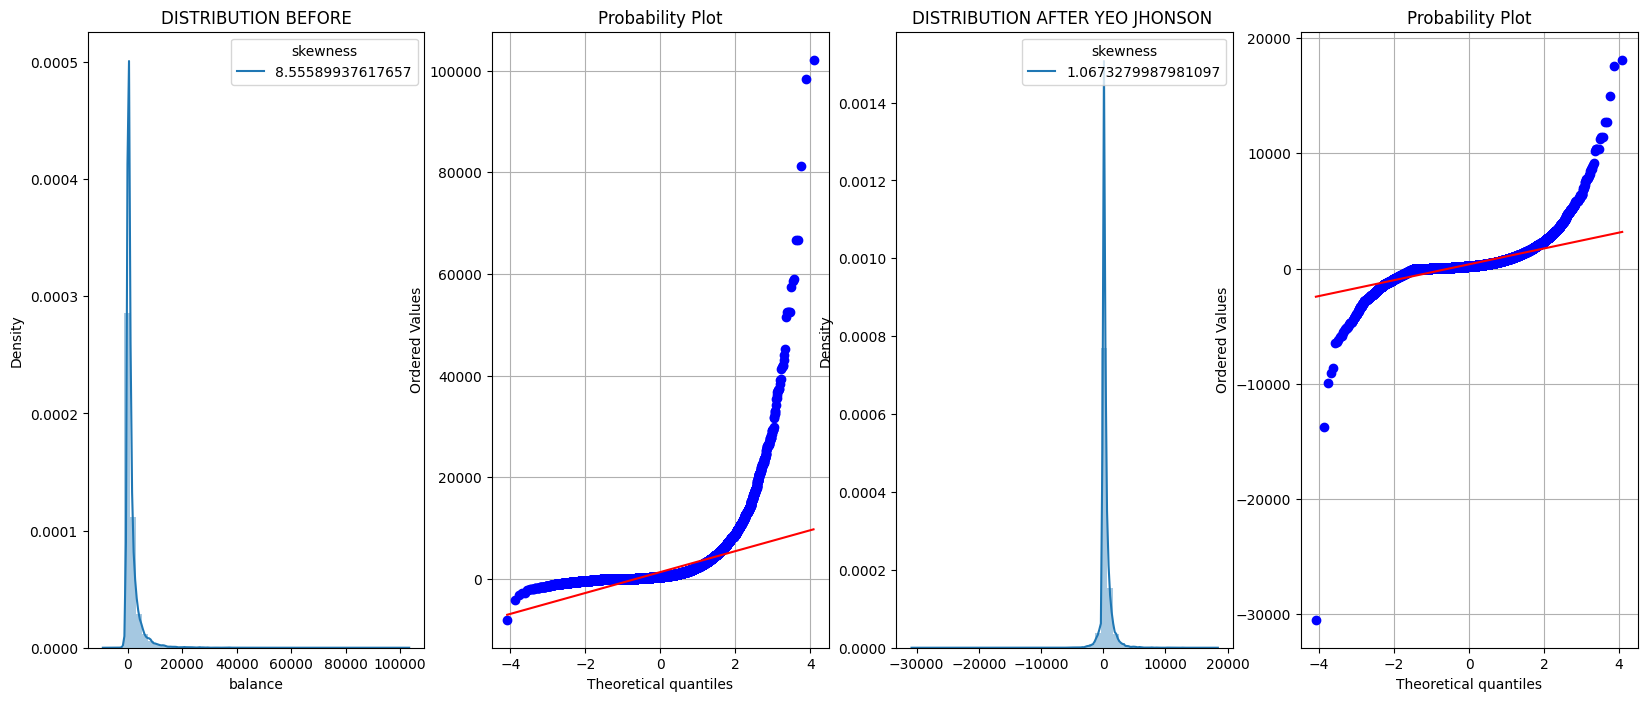

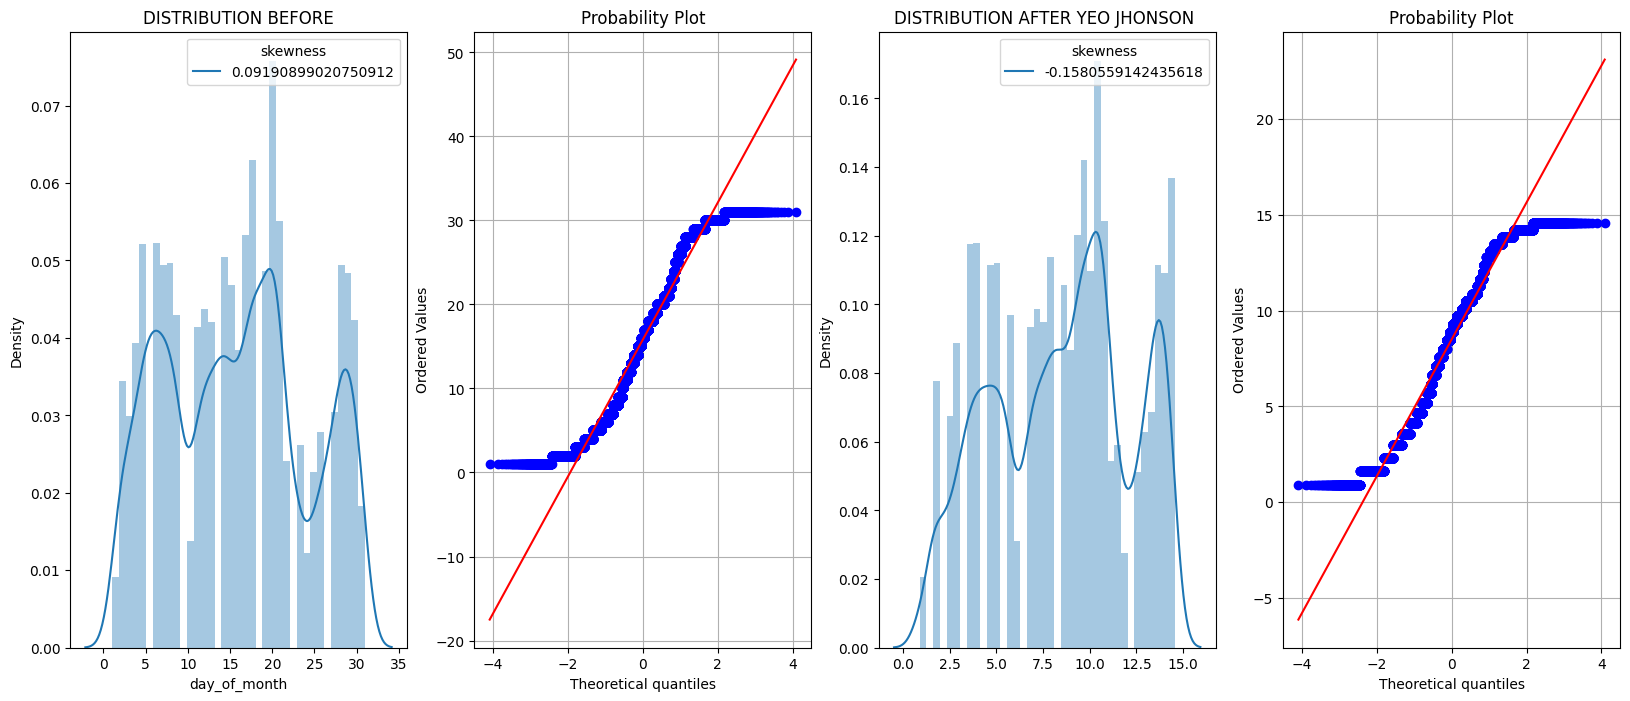

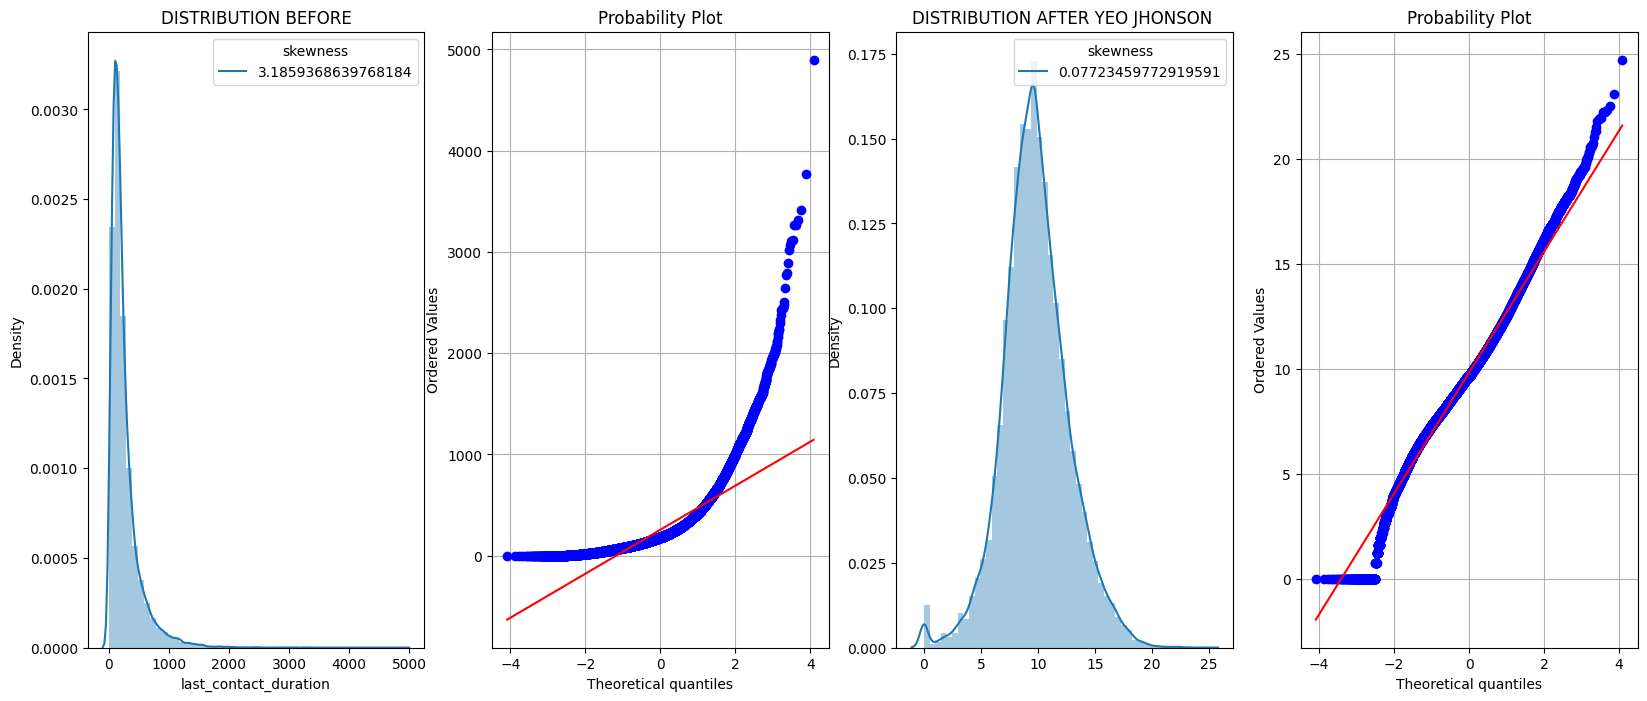

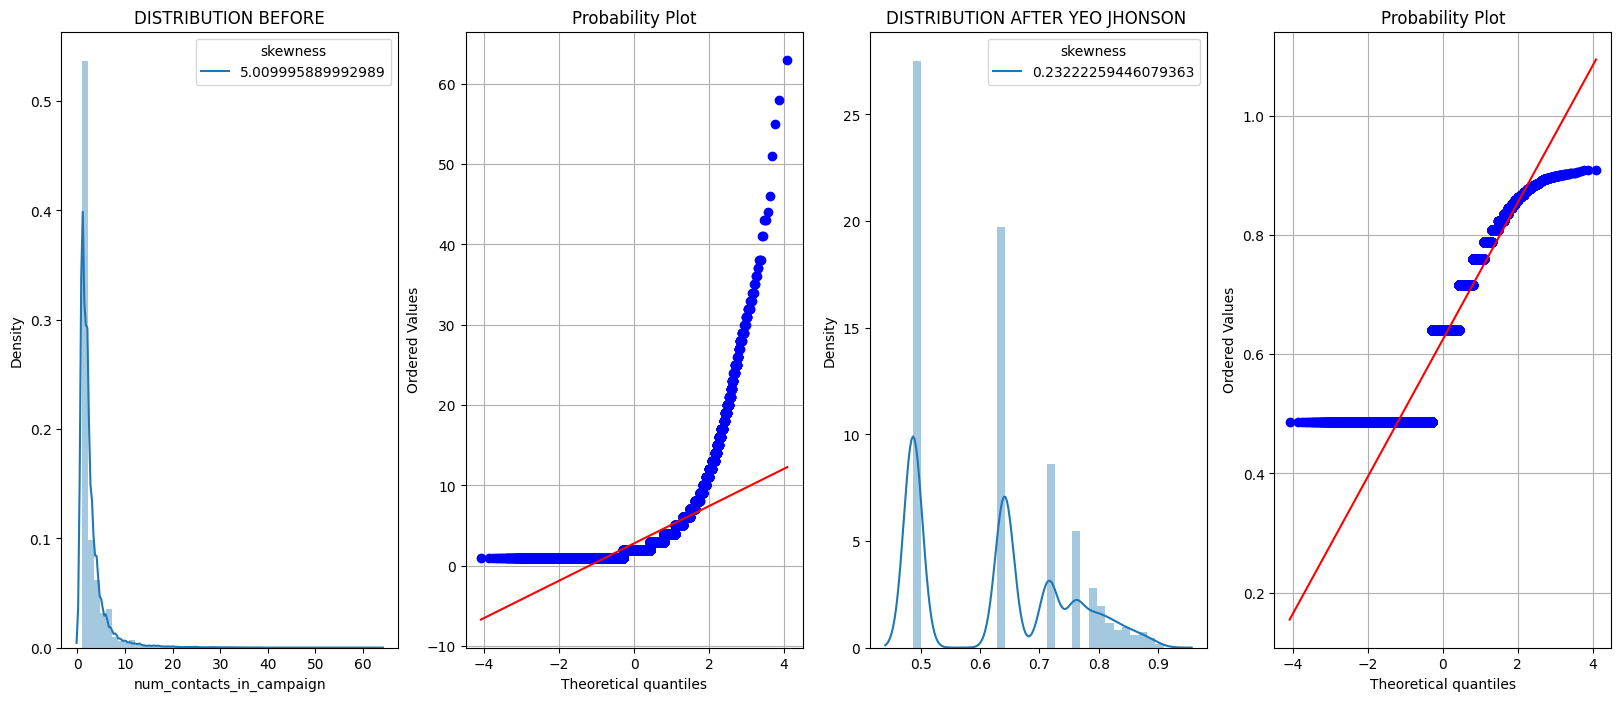

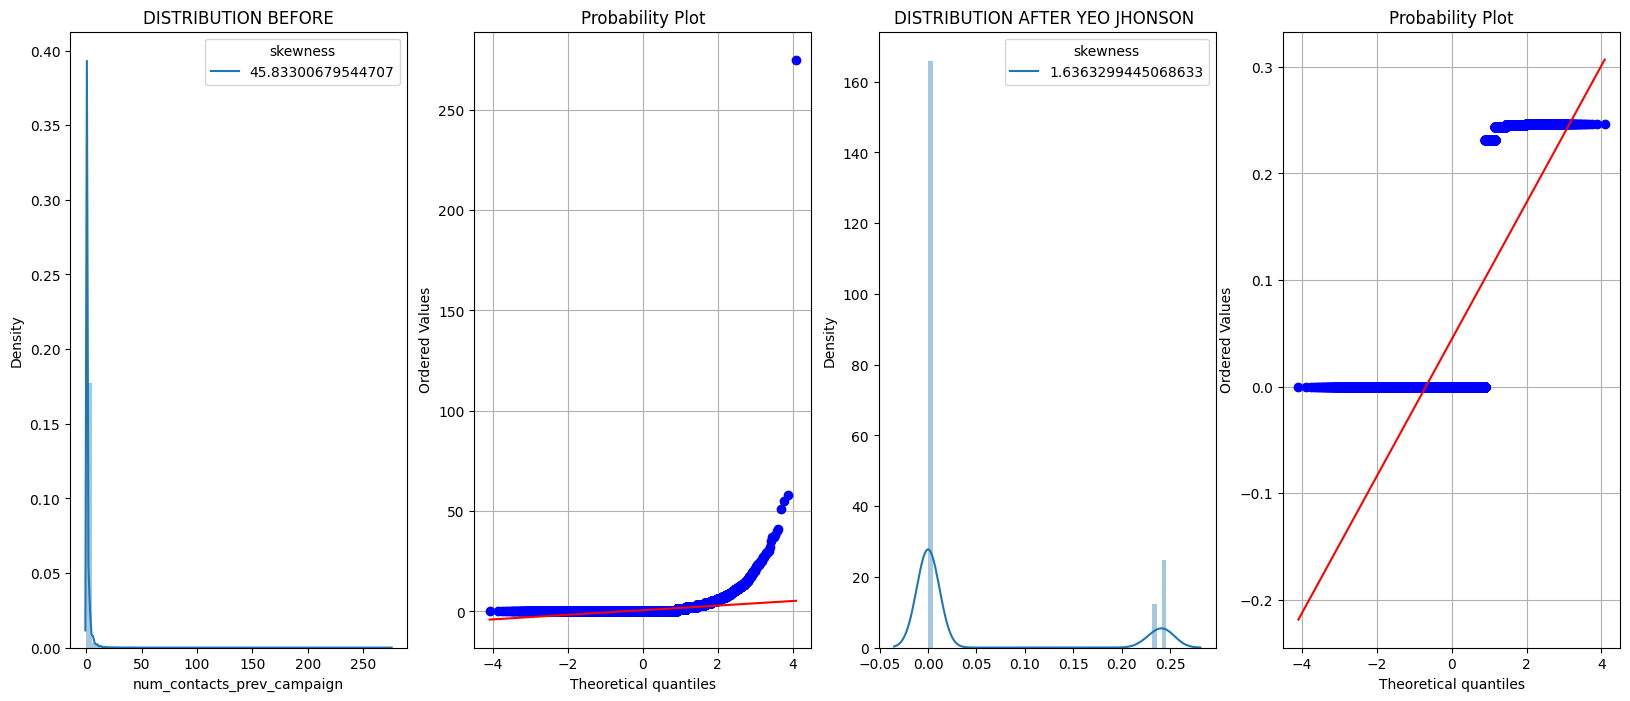

In [95]:
import scipy.stats as stats
from scipy.stats import yeojohnson

for i in numC:
  plt.figure(figsize=(20,8))

  plt.subplot(1,4,1)
  sns.distplot(dtrain[i])
  plt.title("DISTRIBUTION BEFORE",)
  skewness=str(dtrain[i].skew())
  plt.legend([skewness],title=("skewness"))


  plt.subplot(1,4,2)
  stats.probplot(dtrain[i],dist="norm",plot=plt)
  plt.grid()

  plt.subplot(1,4,3)
  yf_target, lam = yeojohnson(dtrain[i])
  sns.distplot(yf_target)
  plt.title("DISTRIBUTION AFTER YEO JHONSON ",)
  series=pd.Series(yf_target)
  skewness=str(series.skew())
  plt.legend([skewness],title=("skewness"))
  #plt.show()

  plt.subplot(1,4,4)
  stats.probplot(yf_target,dist="norm",plot=plt)
  plt.grid()

In [96]:
for i in numC:
  dtrain[i],lam=yeojohnson(dtrain[i])
  print('skewness in',i, dtrain[i].skew())

skewness in customer_age 0.003306199492808144
skewness in balance 1.0673279987981097
skewness in day_of_month -0.1580559142435618
skewness in last_contact_duration 0.07723459772919591
skewness in num_contacts_in_campaign 0.23222259446079363
skewness in num_contacts_prev_campaign 1.6363299445068633


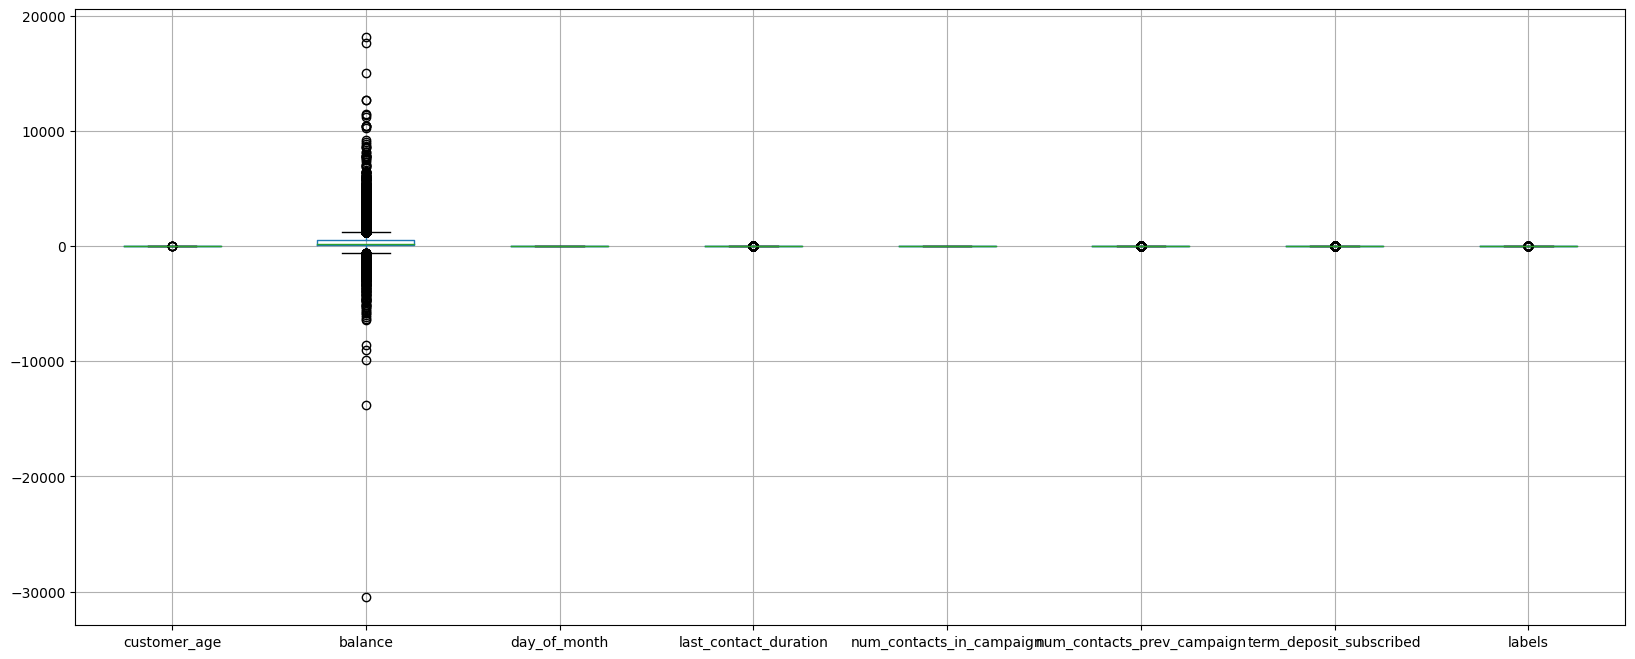

In [97]:
dtrain.boxplot(figsize=(20,8))
plt.show()

One hot Encoding

In [108]:
Y=pd.get_dummies(dtrain,dtype=int)

In [109]:
Y.head()

customer_age     balance  day_of_month  last_contact_duration  \
0      2.894034  133.156684     12.769693              11.381163   
1      3.030637  359.810016      9.691951               8.977898   
2      3.240065  267.735618      3.558382               7.994340   
3      3.030637    1.798893     10.493433               8.633593   
4      3.160831  490.195833      7.564126               6.181308   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                  0.759899                   -0.000000   
1                  0.641189                    0.231392   
2                  0.759899                   -0.000000   
3                  0.716008                   -0.000000   
4                  0.641189                   -0.000000   

   term_deposit_subscribed  labels  job_type_entrepreneur  \
0                        0       0                      0   
1                        0       0                      0   
2                        0       0                      0   
3                        0       0                      0   
4                        0       0                      0   

   job_type_professional  ...  communication_type_telephone  \
0                      1  ...                             0   
1                      1  ...                             0   
2                      0  ...                             0   
3                      0  ...                             0   
4                      1  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           1         0         1         0         0   
1                           0         0         0         0         1   
2                           0         1         0         0         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            1   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              0  
2                              0                              1  
3                              0                              1  
4                              0                              1  

[5 rows x 36 columns]

In [110]:
Y=Y.drop('term_deposit_subscribed',axis=1)

In [111]:
Y=Y.drop('labels',axis=1)

In [112]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
Y_mm=mm.fit_transform(Y)
Y_mm=pd.DataFrame(Y_mm, columns=Y.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Y_sc=sc.fit_transform(Y)
Y_sc=pd.DataFrame(Y_sc, columns=Y.columns)

In [113]:
Y_mm.head()

customer_age   balance  day_of_month  last_contact_duration  \
0      0.272421  0.629882      0.869682               0.460527   
1      0.390196  0.634544      0.644361               0.363282   
2      0.570758  0.632650      0.195324               0.323483   
3      0.390196  0.627180      0.703037               0.349350   
4      0.502445  0.637226      0.488583               0.250120   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                  0.645646                    0.000000   
1                  0.364935                    0.940176   
2                  0.645646                    0.000000   
3                  0.541858                    0.000000   
4                  0.364935                    0.000000   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                    0.0                    1.0               0.0   
1                    0.0                    1.0               0.0   
2                    0.0                    0.0               1.0   
3                    0.0                    0.0               1.0   
4                    0.0                    1.0               0.0   

   job_type_unemployed  ...  communication_type_telephone  \
0                  0.0  ...                           0.0   
1                  0.0  ...                           0.0   
2                  0.0  ...                           0.0   
3                  0.0  ...                           0.0   
4                  0.0  ...                           0.0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                         1.0       0.0       1.0       0.0       0.0   
1                         0.0       0.0       0.0       0.0       1.0   
2                         0.0       1.0       0.0       0.0       0.0   
3                         1.0       0.0       1.0       0.0       0.0   
4                         0.0       0.0       1.0       0.0       0.0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                            0.0                          0.0   
1                            0.0                          1.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                            0.0                            1.0  
1                            0.0                            0.0  
2                            0.0                            1.0  
3                            0.0                            1.0  
4                            0.0                            1.0  

[5 rows x 34 columns]

In [114]:
Z=Y_mm.values

In [115]:
Z

array([[0.27242096, 0.6298818 , 0.86968164, ..., 0.        , 0.        ,
        1.        ],
       [0.39019583, 0.63454398, 0.6443609 , ..., 1.        , 0.        ,
        0.        ],
       [0.57075769, 0.63265004, 0.19532374, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50244536, 0.6295305 , 0.78795395, ..., 0.        , 0.        ,
        1.        ],
       [0.59588756, 0.64510842, 0.42164421, ..., 0.        , 0.        ,
        1.        ],
       [0.45704732, 0.63527266, 0.6443609 , ..., 0.        , 0.        ,
        1.        ]])

**Kmeans Clustering**

In [118]:
!pip install yellowbrick

In [119]:
from yellowbrick.cluster import KElbowVisualizer

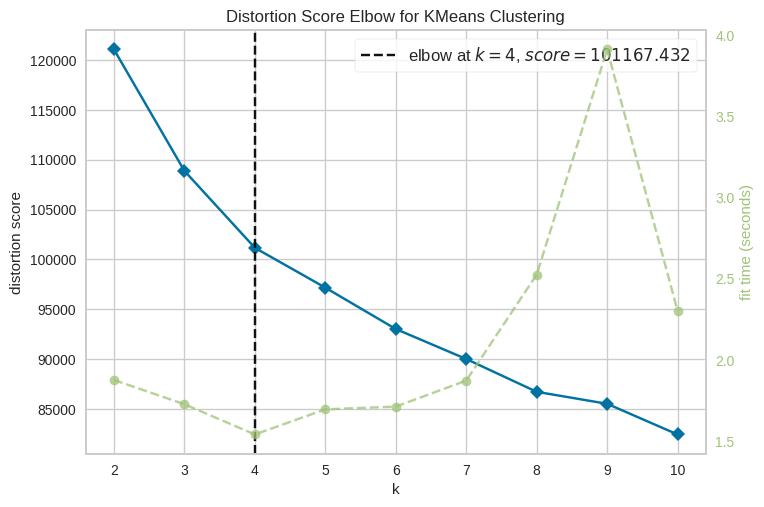

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [122]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(Z)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(Z)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Elbow method - 4 optimum clusters

In [123]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(Z)
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(Z,y_kmeans)
silhouette_score_avg

0.13606538813339905

silhouette score of 0.136

Using PCA to reduce dimensions

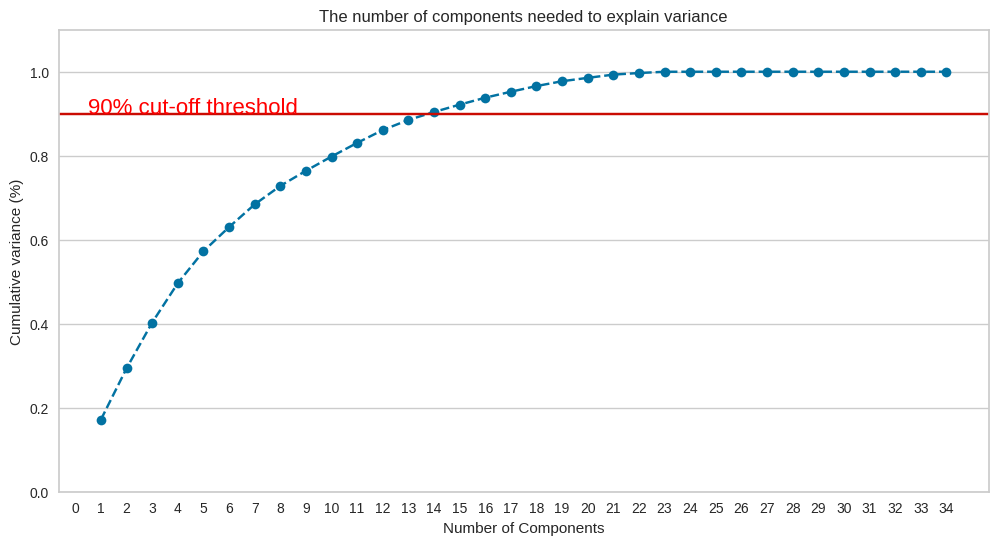

In [126]:
from sklearn.decomposition import PCA
pca=PCA().fit(Y_mm)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 35, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

optimum number of components within threshold of 0.9 cummulative variance is 12 ,13. will use 13

In [136]:
pca=PCA(n_components=13)
pca.fit(Y_mm)
x_pca=pca.transform(Y_mm)

Try Kmeans with PCA

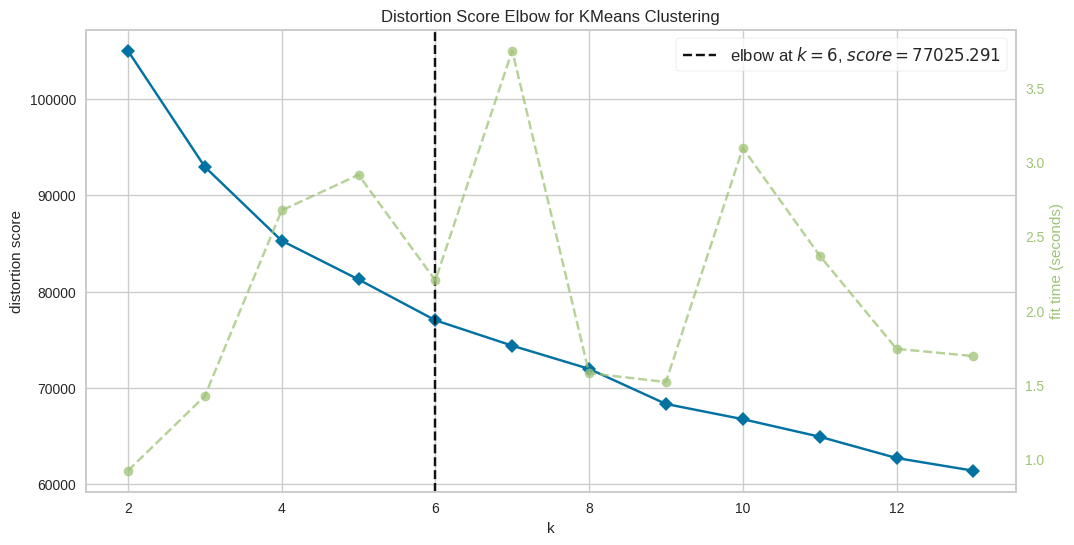

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:
wcss=[]
for i in range(2,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

visualizer = KElbowVisualizer(kmeans, k=(2,14))

visualizer.fit(x_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

optimum number of clusters as 4 looks more like an elbow point.

In [140]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x_pca)
silhouette_score_avg=silhouette_score(x_pca,y_kmeans)
silhouette_score_avg

0.16179298751164586

Kmeans clustering with PCA, silhouette score is 0.1617

In [141]:
labelss=pd.DataFrame(y_kmeans)
labelss.value_counts()

1    9712
0    9121
2    7310
3    5504
Name: count, dtype: int64

In [157]:
dtrain['cluster'] = kmeans.labels_

In [162]:
dtrain['cluster'].value_counts()

cluster
1    9712
0    9121
2    7310
3    5504
Name: count, dtype: int64

In [167]:
dtrain.drop('labels',axis=1,inplace=True)
dtrain.drop('labelss',axis=1,inplace=True)
dtrain.drop('term_deposit_subscribed',axis=1,inplace=True)

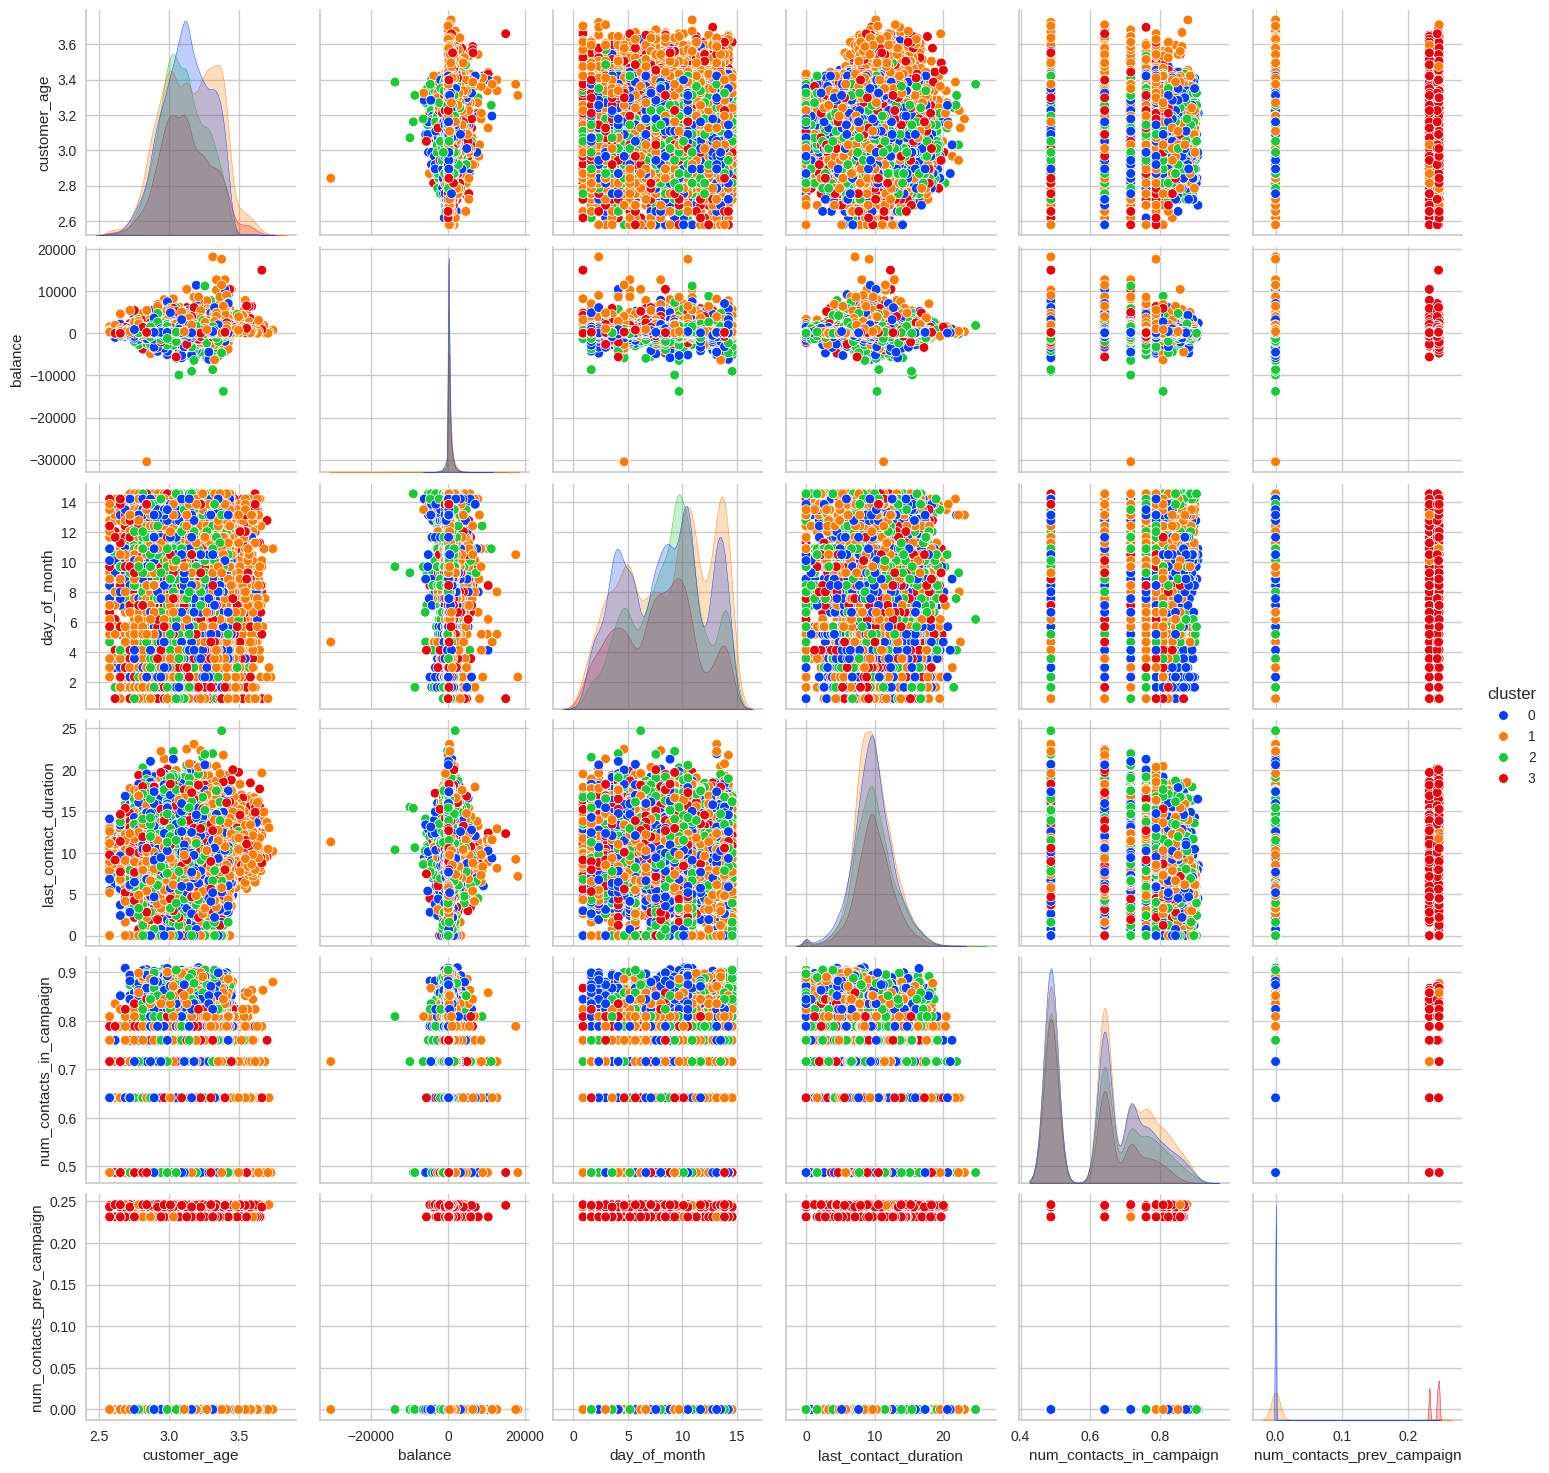

In [168]:
sns.pairplot(dtrain, hue='cluster', palette='bright')
plt.show()

silhouette score of 0.167 is low and the above pairplot shows that the clusters are not spaced out properly

**Agglomerative Clustering with PCA**

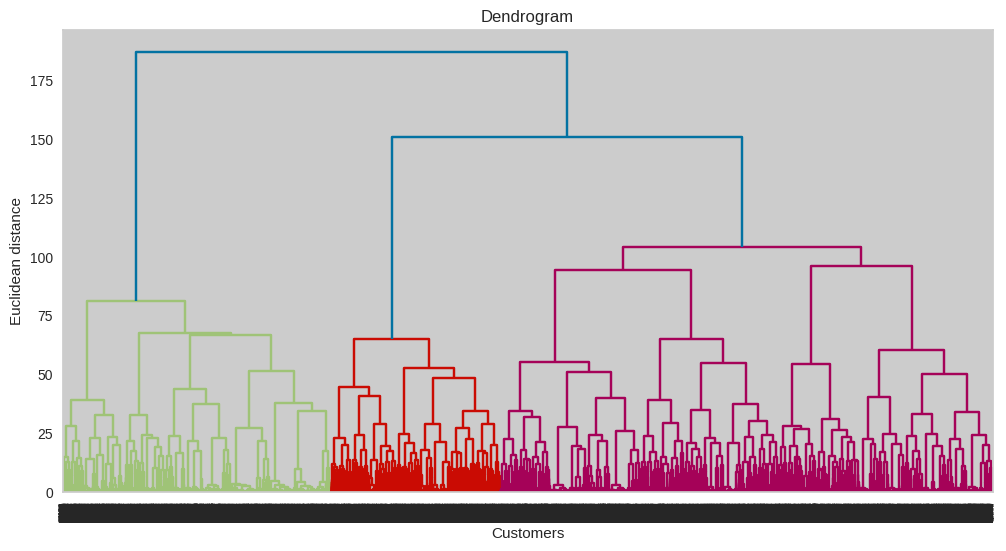

In [170]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(x_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

optimum number of clusters from dendrogram is 3

In [172]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
hc.fit(x_pca)
dtrain['cluster'] = hc.labels_

In [173]:
silhouette_score_hc1=round(silhouette_score(x_pca,hc.labels_),3)
silhouette_score_hc1

0.17

In [174]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)
sil=silhouette_score(x_pca,y_hc)
print(sil)

0.1695861451438615


silhouette score of 0.169 with Hierarchical Clustering

In [175]:
dtrain['cluster'].value_counts()

cluster
0    16758
1     9159
2     5730
Name: count, dtype: int64

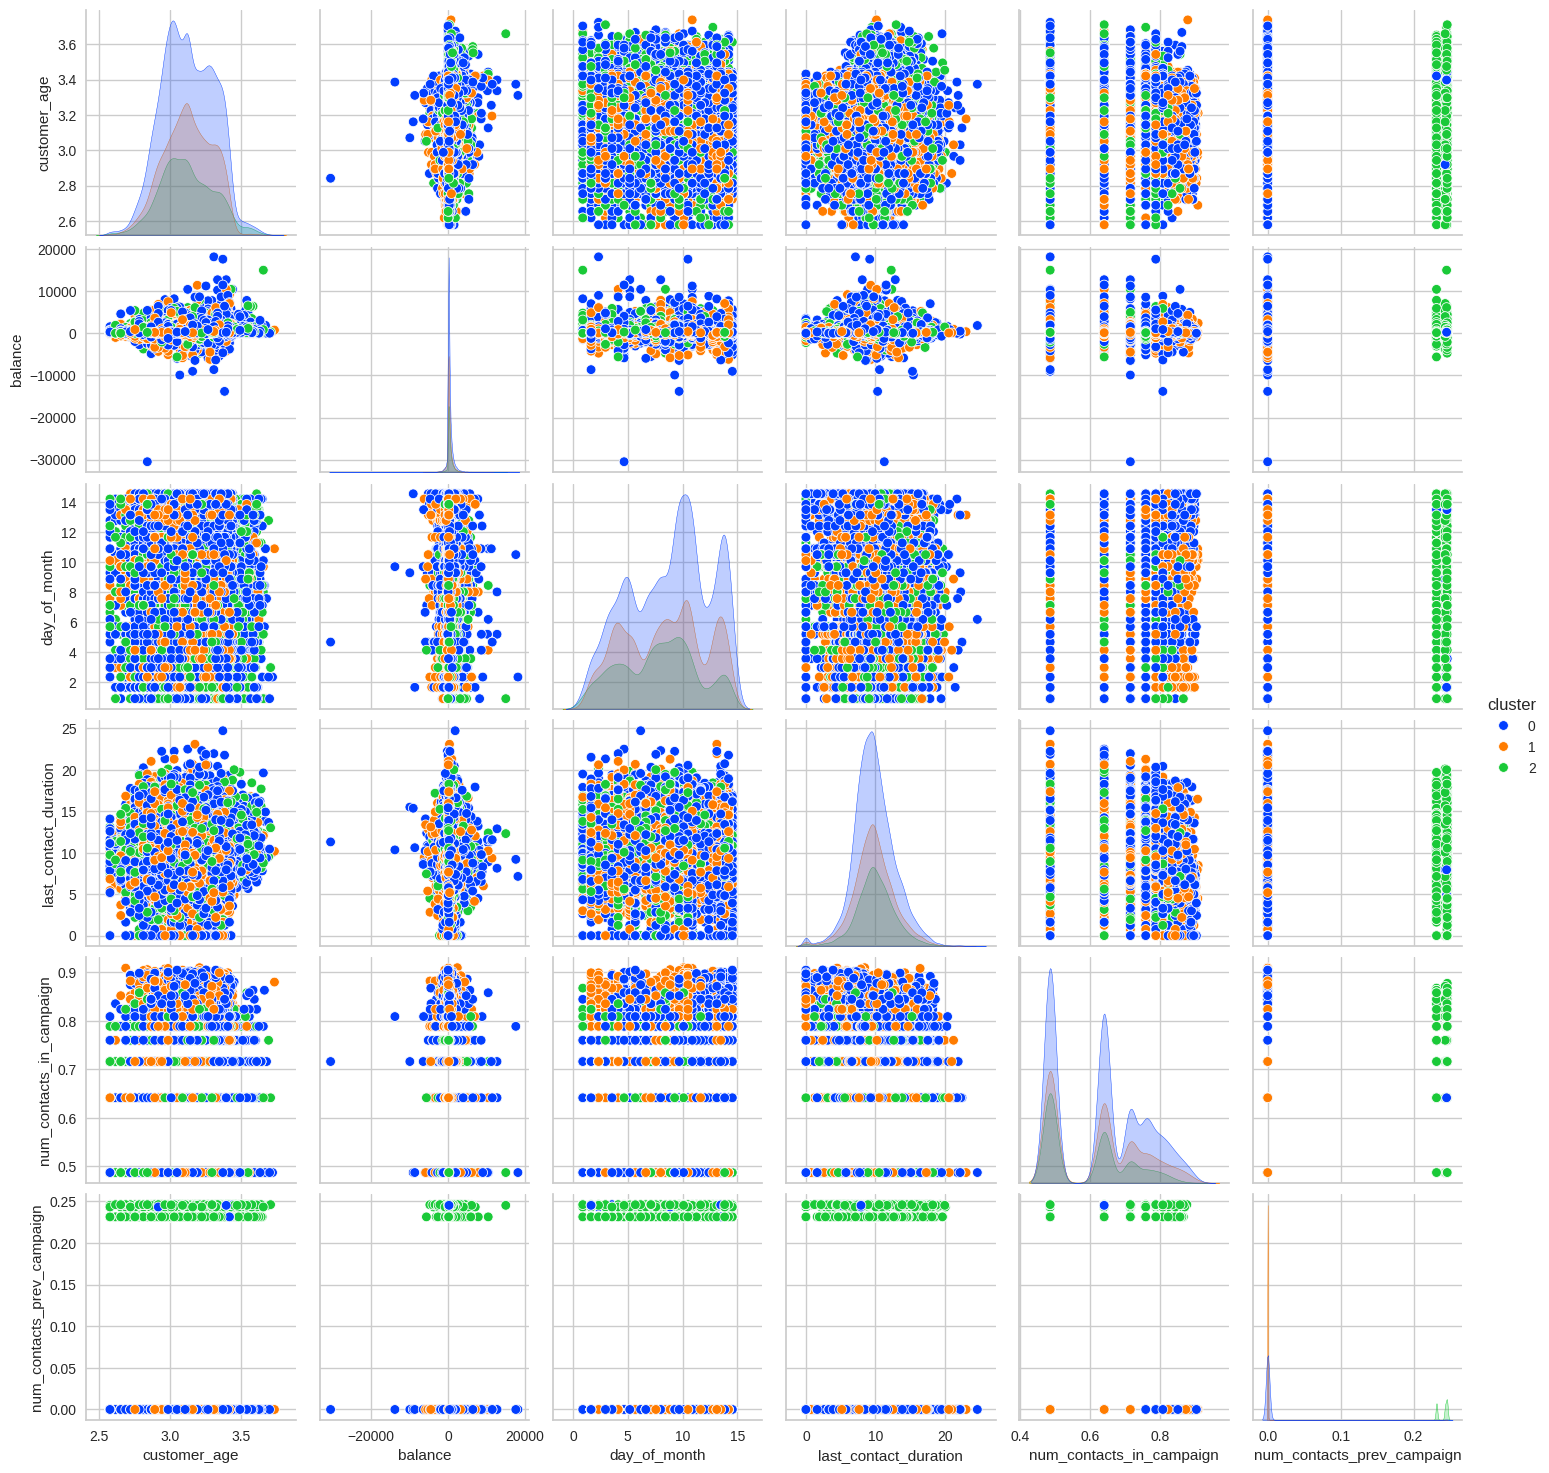

In [176]:
sns.pairplot(dtrain, hue='cluster', palette='bright')
plt.show()

Above pairplot does not give a clear separation among the 3 clusters

In [ ]:
dtrain.drop('cluster',axis=1,inplace=True)

DBSCAN with pca and minmax scaler

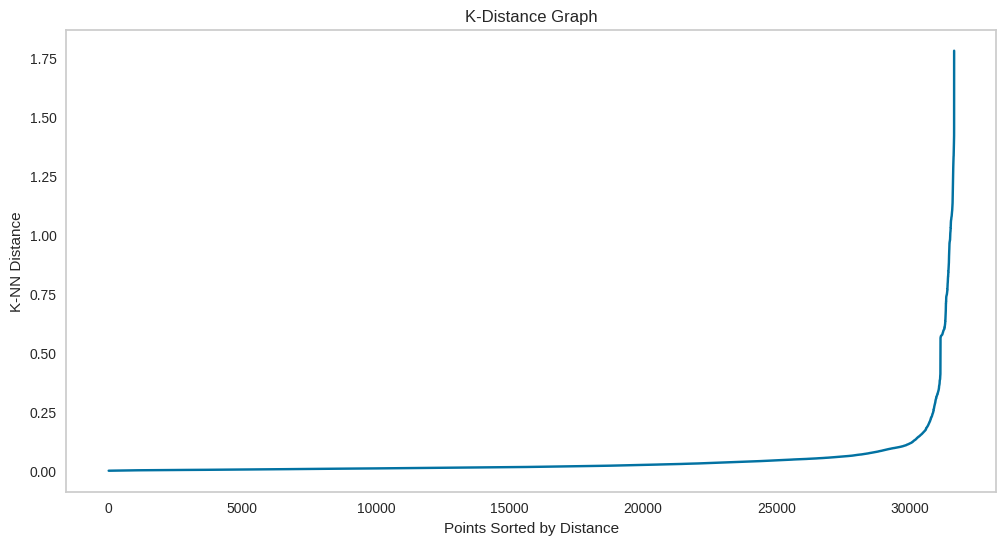

In [178]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 14)
model = knn.fit(x_pca)
distances, indices = knn.kneighbors(x_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('K-NN Distance')
plt.title('K-Distance Graph');

In [189]:
db = DBSCAN(eps=1.3, min_samples=14).fit(x_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  26
Number of Outliers :  313


DBSCAN with PCA and using minmaxscaler with Epsilon of 1.3 and min_samples of 14, has given 26 clusters which is not a good analysis.

In [190]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_pca, labels)
print(score)

0.1138187272074725


26 clusters with a silhouette score of 0.1138

It is said that although there may be categorical variables that show dependency on the target variable in terms of decision making , it is better to drop all categorical variables and compute using only the numerical features for clustering.

**Will do cluster analysis only for numerical variables**

In [3]:
new=pd.read_csv('/content/Train.csv')

In [4]:
new.head()

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [5]:
new.drop('id',axis=1,inplace=True)

In [6]:
new.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [7]:
new.isna().sum()

customer_age                  619
job_type                        0
marital                       150
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
last_contact_duration         311
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
# will drop the missing values

In [8]:
new.dropna(inplace=True)

In [9]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29948 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_age                29948 non-null  float64
 1   job_type                    29948 non-null  object 
 2   marital                     29948 non-null  object 
 3   education                   29948 non-null  object 
 4   default                     29948 non-null  object 
 5   balance                     29948 non-null  float64
 6   housing_loan                29948 non-null  object 
 7   personal_loan               29948 non-null  object 
 8   communication_type          29948 non-null  object 
 9   day_of_month                29948 non-null  int64  
 10  month                       29948 non-null  object 
 11  last_contact_duration       29948 non-null  float64
 12  num_contacts_in_campaign    29948 non-null  float64
 13  num_contacts_prev_campaign  29948 no

In [10]:
num=new.select_dtypes(include=['int64','float64'])

In [11]:
num

customer_age  balance  day_of_month  last_contact_duration  \
0              28.0    285.0            26                  303.0   
1              34.0    934.0            18                  143.0   
2              46.0    656.0             5                  101.0   
3              34.0      2.0            20                  127.0   
4              41.0   1352.0            13                   49.0   
...             ...      ...           ...                    ...   
31642          58.0    567.0             2                   99.0   
31643          51.0   1072.0            20                   31.0   
31644          41.0    242.0            23                   89.0   
31645          48.0   2699.0            11                  216.0   
31646          38.0   1045.0            18                  183.0   

       num_contacts_in_campaign  num_contacts_prev_campaign  \
0                           4.0                           0   
1                           2.0                           1   
2                           4.0                           0   
3                           3.0                           0   
4                           2.0                           0   
...                         ...                         ...   
31642                       2.0                           3   
31643                       7.0                           0   
31644                       2.0                           0   
31645                       6.0                           0   
31646                      10.0                           0   

       term_deposit_subscribed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
31642                        0  
31643                        0  
31644                        0  
31645                        0  
31646                        0  

[29948 rows x 7 columns]

In [12]:
num.drop('term_deposit_subscribed',axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
num_mm=mm.fit_transform(num)
num_mm=pd.DataFrame(num_mm, columns=num.columns)

In [14]:
num_mm.head()

customer_age   balance  day_of_month  last_contact_duration  \
0      0.126582  0.075399      0.833333               0.061837   
1      0.202532  0.081291      0.566667               0.029184   
2      0.354430  0.078767      0.133333               0.020612   
3      0.202532  0.072829      0.633333               0.025918   
4      0.291139  0.085086      0.400000               0.010000   

   num_contacts_in_campaign  num_contacts_prev_campaign  
0                  0.048387                    0.000000  
1                  0.016129                    0.003636  
2                  0.048387                    0.000000  
3                  0.032258                    0.000000  
4                  0.016129                    0.000000

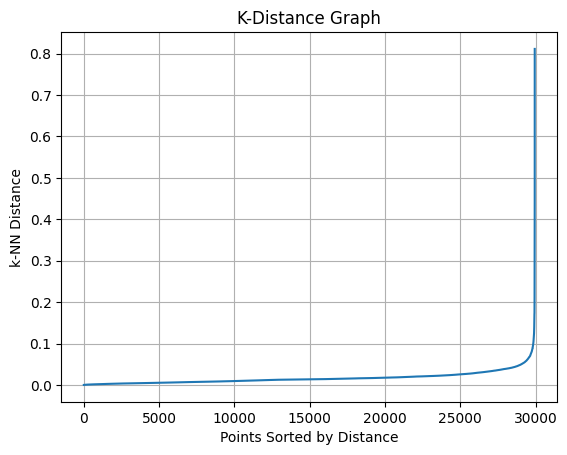

In [15]:
# using DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=7)
model = knn.fit(num_mm)
distances, indices = knn.kneighbors(num_mm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(axis='both')
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [21]:
db = DBSCAN(eps=0.08, min_samples =7).fit(num_mm)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  2
Number of Outliers :  376


In [22]:
from sklearn.metrics import silhouette_score
score = silhouette_score(num_mm, labels)
print(score)

0.2170812641544912


In [24]:
num['cluster']=db.labels_

In [25]:
num['cluster'].value_counts()

cluster
 0    29562
-1      376
 1       10
Name: count, dtype: int64

In [27]:
import plotly.express as px

fig = px.scatter(num, x="customer_age", y="last_contact_duration", hover_name="balance", color = "cluster", size_max=60)
fig.update_layout(
     height=800)
fig.show()

In [28]:
px.scatter_3d(data_frame=num,x='customer_age',y='balance',z='last_contact_duration',color='cluster',template='plotly_dark',
             title='3D Scatter plot for DBSCAN Clusters')

In [35]:
num.drop('cluster',axis=1,inplace=True)

Using Kmeans with numerical data

Text(0, 0.5, 'WCSS')

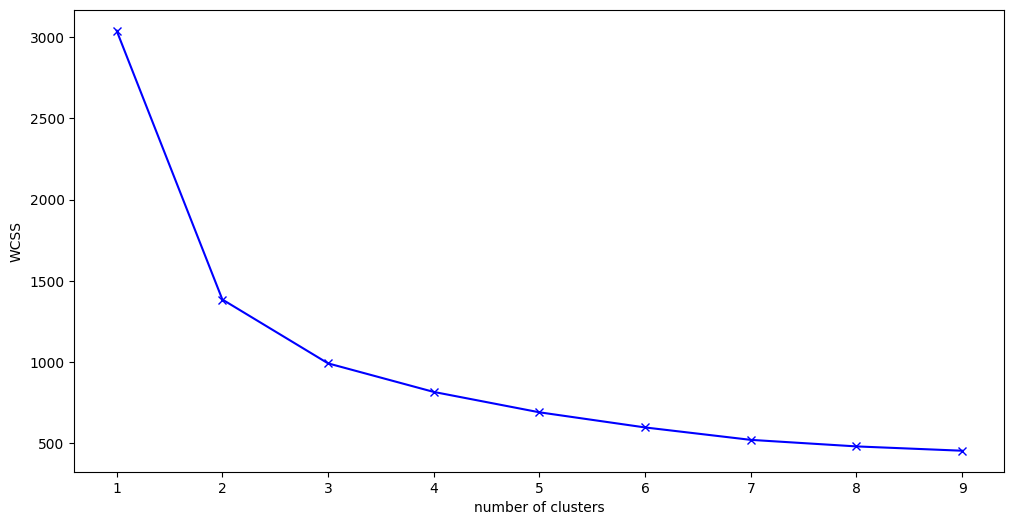

In [36]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(num_mm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [37]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(num_mm)
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(num_mm,y_kmeans)
silhouette_score_avg

0.44301295114155614

In [38]:
num_mm.head()

customer_age   balance  day_of_month  last_contact_duration  \
0      0.126582  0.075399      0.833333               0.061837   
1      0.202532  0.081291      0.566667               0.029184   
2      0.354430  0.078767      0.133333               0.020612   
3      0.202532  0.072829      0.633333               0.025918   
4      0.291139  0.085086      0.400000               0.010000   

   num_contacts_in_campaign  num_contacts_prev_campaign  
0                  0.048387                    0.000000  
1                  0.016129                    0.003636  
2                  0.048387                    0.000000  
3                  0.032258                    0.000000  
4                  0.016129                    0.000000

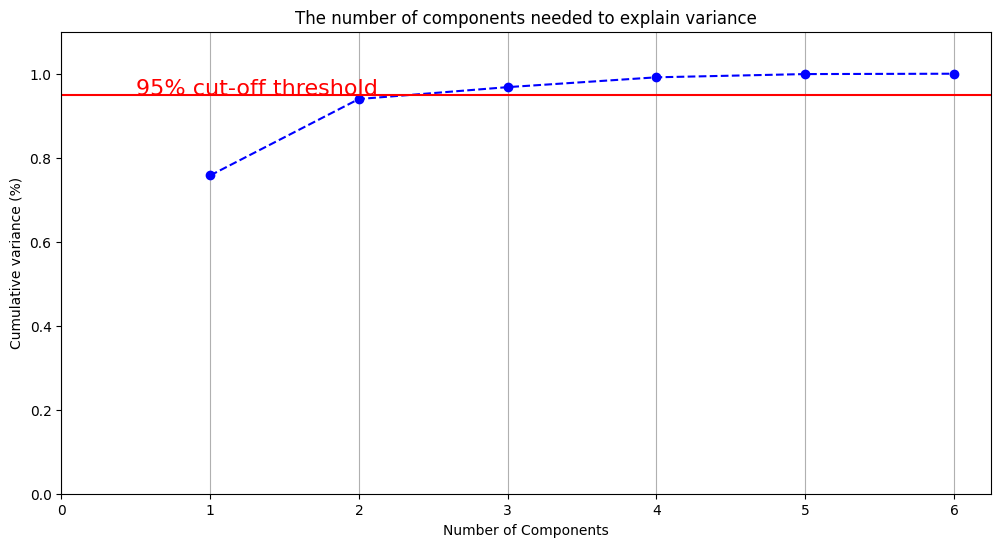

In [42]:
from sklearn.decomposition import PCA
pca=PCA().fit(num_mm)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 7, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

covariance of 0.95, gives us 2 components

In [43]:
pca=PCA(n_components=2)
pca.fit(num_mm)
num_pca=pca.transform(num_mm)

Text(0, 0.5, 'WCSS')

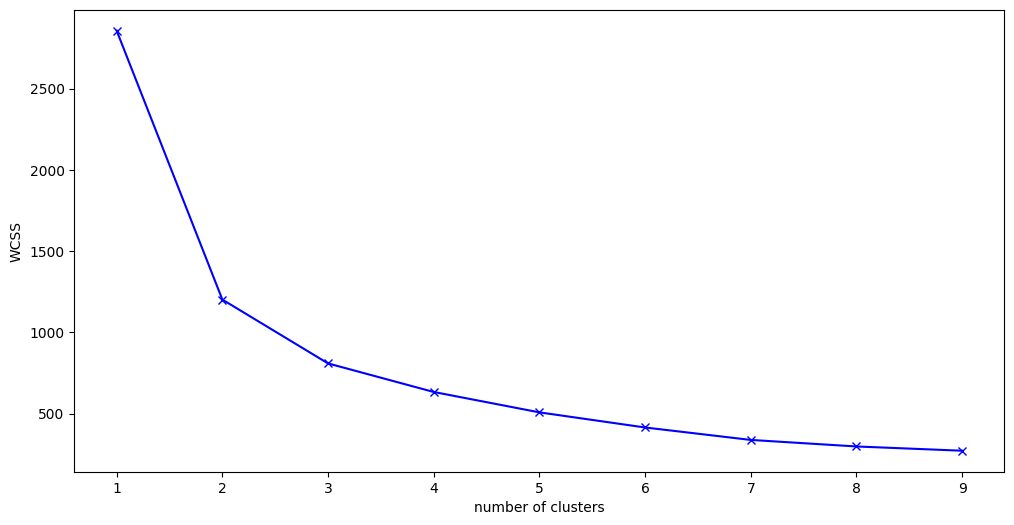

In [45]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(num_pca)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [46]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(num_pca)
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(num_pca,y_kmeans)
silhouette_score_avg

0.47393004832723323

After PCA, kmeans score has improved to 0.47

In [47]:
num['cluster']=kmeans.labels_

In [48]:
num['cluster'].value_counts()

cluster
1    15454
0    14494
Name: count, dtype: int64

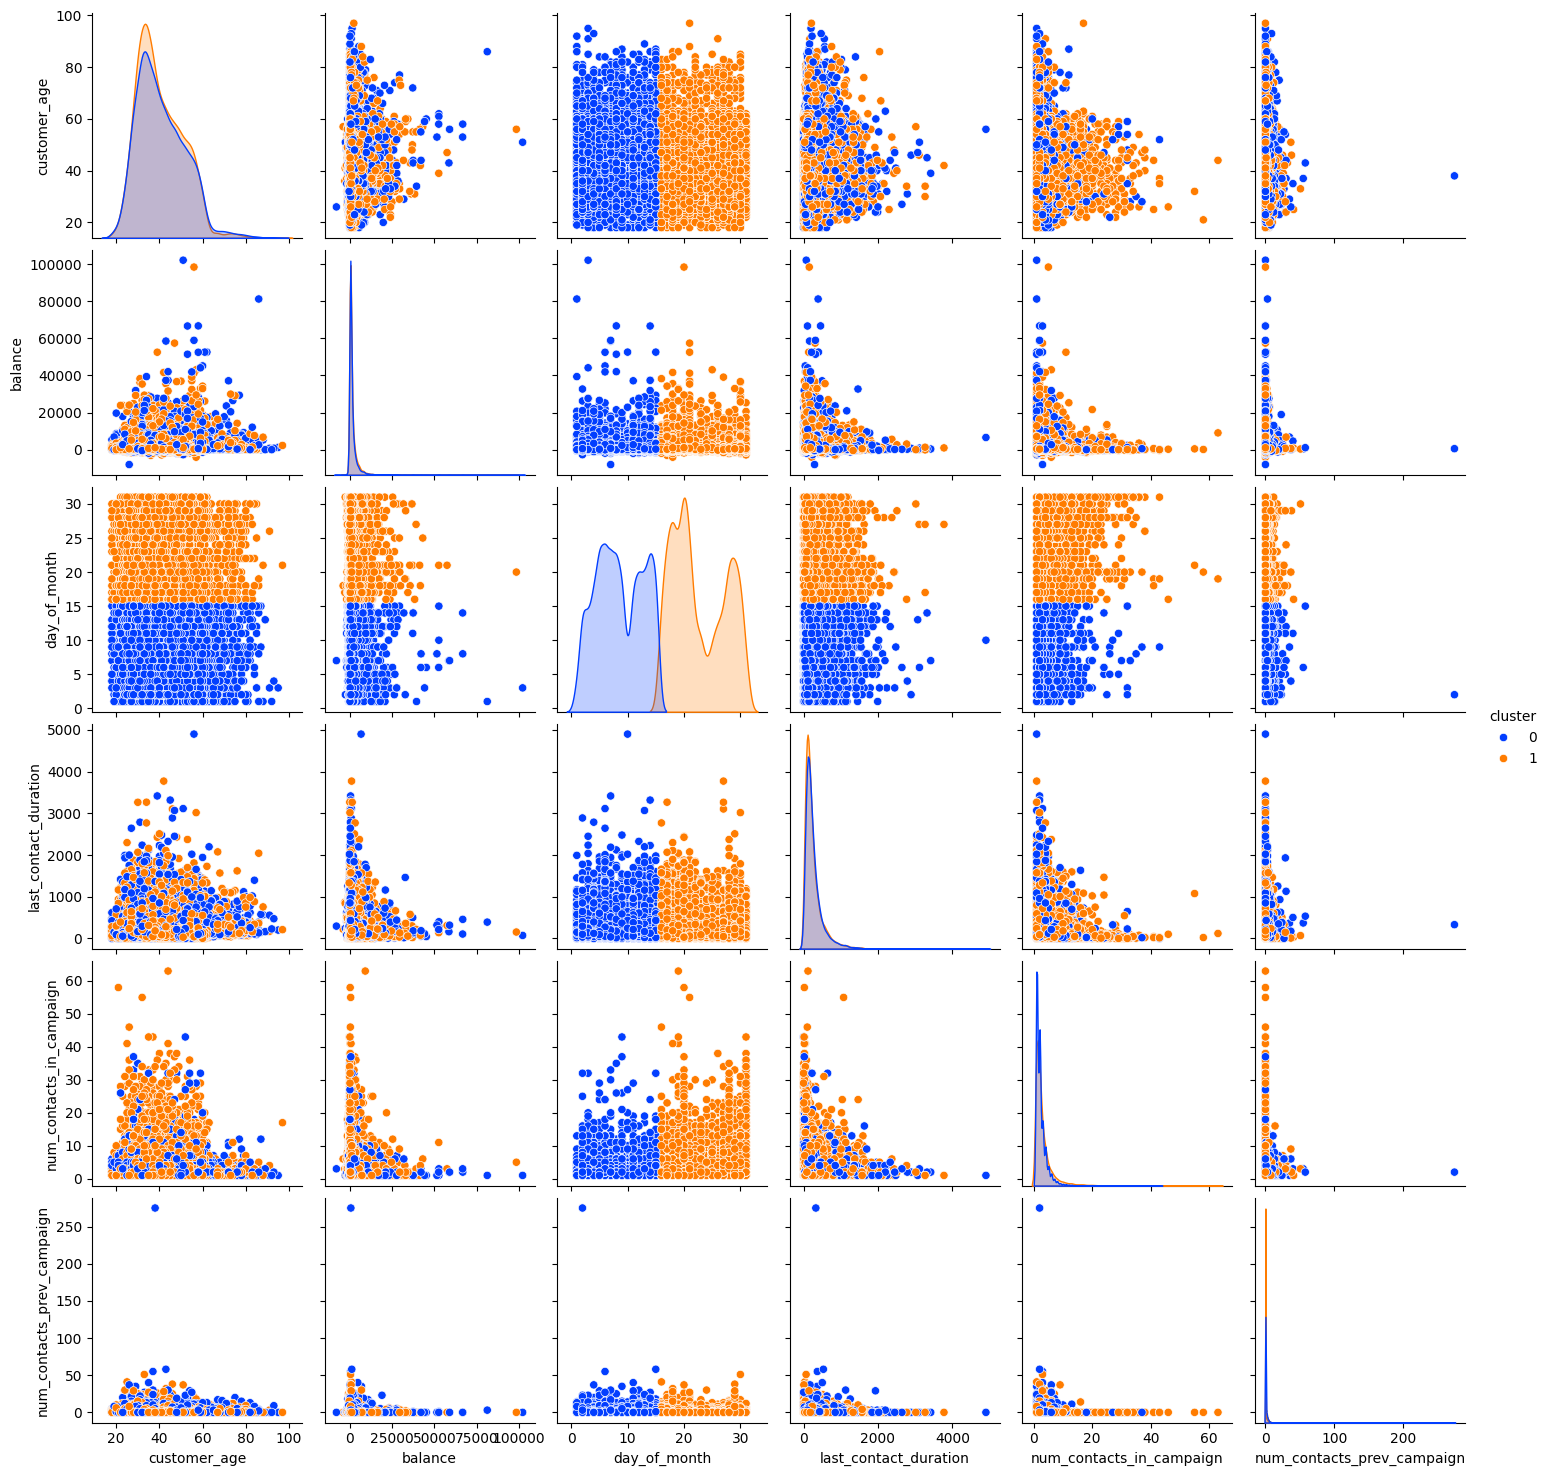

In [49]:
sns.pairplot(num, hue='cluster', palette='bright')
plt.show()

In [51]:
y_kmeans

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

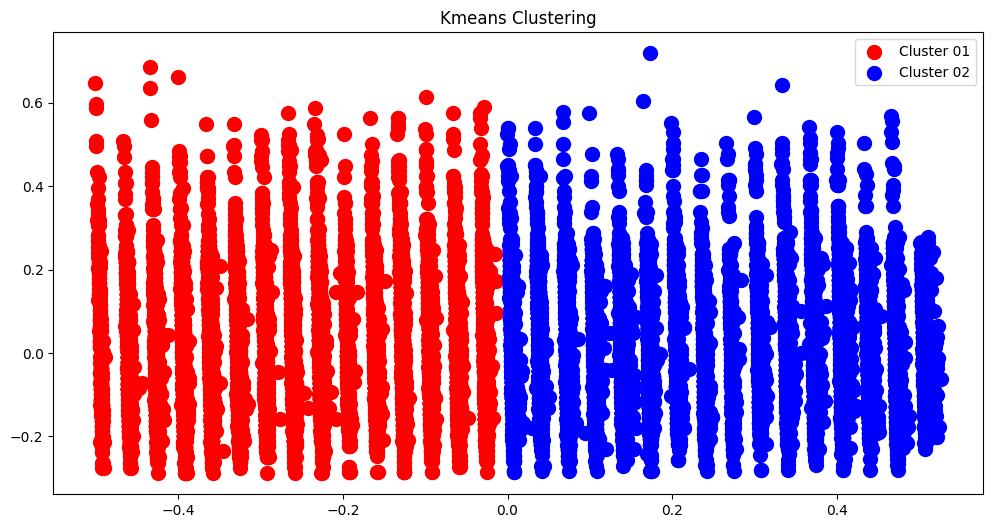

In [54]:
plt.scatter(num_pca[y_kmeans==0,0],num_pca[y_kmeans==0,1],s=100,c='red',label='Cluster 01')
plt.scatter(num_pca[y_kmeans==1,0],num_pca[y_kmeans==1,1],s=100,c='blue',label='Cluster 02')
plt.title('Kmeans Clustering')
plt.legend()
plt.show()

In [56]:
num[num['cluster']==1]

customer_age  balance  day_of_month  last_contact_duration  \
0              28.0    285.0            26                  303.0   
1              34.0    934.0            18                  143.0   
3              34.0      2.0            20                  127.0   
5              65.0   2880.0            23                  163.0   
6              57.0    495.0            18                  687.0   
...             ...      ...           ...                    ...   
31637          56.0    227.0            17                   41.0   
31641          26.0    459.0            29                  237.0   
31643          51.0   1072.0            20                   31.0   
31644          41.0    242.0            23                   89.0   
31646          38.0   1045.0            18                  183.0   

       num_contacts_in_campaign  num_contacts_prev_campaign  cluster  
0                           4.0                           0        1  
1                           2.0                           1        1  
3                           3.0                           0        1  
5                           1.0                           0        1  
6                           4.0                           0        1  
...                         ...                         ...      ...  
31637                       1.0                           0        1  
31641                       1.0                           8        1  
31643                       7.0                           0        1  
31644                       2.0                           0        1  
31646                      10.0                           0        1  

[15454 rows x 7 columns]

In [57]:
num.drop('cluster',inplace=True,axis=1)

Using Agglomerative only on numerical features with PCA

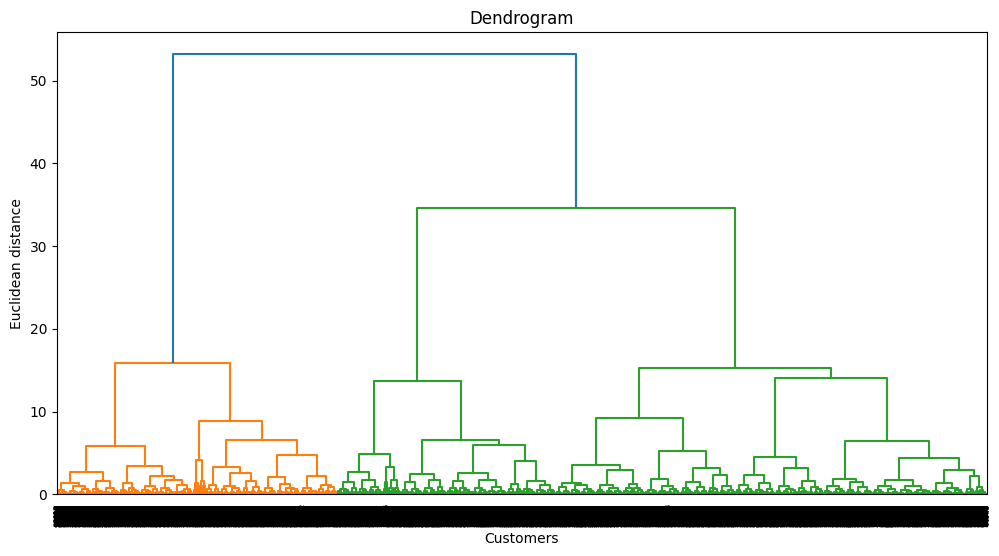

In [58]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(num_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

dendrogram clearly shows 2 clusters

In [60]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(num_pca)
sil=silhouette_score(num_pca,y_hc)
print(sil)

0.43211619259669115


Summary:

From the clustering algorithms applied to the train dataset. It is clear that the algorithms with the best score have given 2 clusters.

Robust Scaler was used for DBSCAN with a silhouette score of 0.83

MinMax Scaler was used for KMeans and Hierarchical Clustering.

**Will apply the same methods for the test dataset and see if the results are similar**

In [4]:
dtest=pd.read_csv('/content/Test.csv')
dtest.head()

id  customer_age     job_type   marital  education default  balance  \
0  id_17231          55.0      retired   married   tertiary      no   7136.0   
1  id_34508          24.0  blue-collar    single  secondary      no    179.0   
2  id_44504          46.0   technician  divorced  secondary      no    143.0   
3    id_174          56.0    housemaid    single    unknown      no   6023.0   
4   id_2115          62.0      retired   married  secondary      no   2913.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0           no            no           cellular            13   aug   
1          yes            no           cellular            18   may   
2           no            no           cellular             8   jul   
3           no            no            unknown             6   jun   
4           no            no           cellular            12   apr   

   last_contact_duration  num_contacts_in_campaign  \
0                   90.0                       2.0   
1                   63.0                       2.0   
2                  208.0                       1.0   
3                   34.0                       1.0   
4                  127.0                       1.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                               NaN                           0   
2                               NaN                           0   
3                               NaN                           0   
4                             188.0                           1   

  prev_campaign_outcome  
0               unknown  
1               unknown  
2               unknown  
3               unknown  
4               success

In [5]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [6]:
dtest.isna().sum()/len(dtest)*100

id                                   0.000000
customer_age                         1.990563
job_type                             0.000000
marital                              0.597169
education                            0.000000
default                              0.000000
balance                              1.334415
housing_loan                         0.000000
personal_loan                        0.545562
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.899440
num_contacts_in_campaign             0.331761
days_since_prev_campaign_contact    82.003834
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
dtype: float64

In [7]:
dtest.duplicated().sum()

0

In [8]:
dtest.drop('id',axis=1,inplace=True)
dtest.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

In [9]:
dtest['customer_age']=dtest['customer_age'].fillna(dtest['customer_age'].median())
dtest['marital']=dtest['marital'].fillna(dtest['marital'].mode()[0])
dtest['balance']=dtest['balance'].fillna(dtest['balance'].median())
dtest['personal_loan']=dtest['personal_loan'].fillna(dtest['personal_loan'].mode()[0])
dtest['last_contact_duration']=dtest['last_contact_duration'].fillna(dtest['last_contact_duration'].median())
dtest['num_contacts_in_campaign']=dtest['num_contacts_in_campaign'].fillna(dtest['num_contacts_in_campaign'].median())

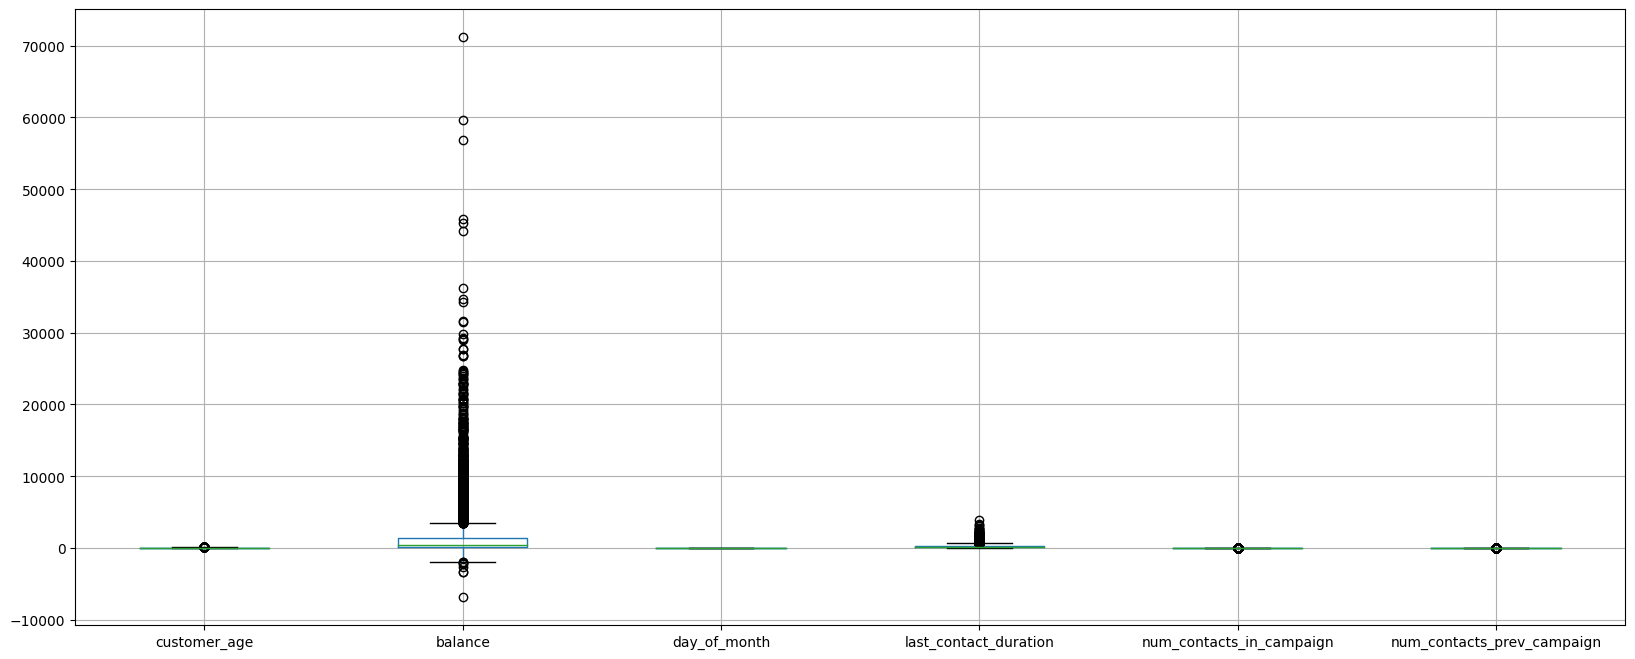

In [10]:
dtest.boxplot(figsize=(20,8))
plt.show()

In [11]:
dtest_num=dtest.select_dtypes(include=['int64','float64'])

In [12]:
dtest_num.corr()

customer_age   balance  day_of_month  \
customer_age                    1.000000  0.069649     -0.003213   
balance                         0.069649  1.000000      0.008863   
day_of_month                   -0.003213  0.008863      1.000000   
last_contact_duration           0.004368  0.031490     -0.022659   
num_contacts_in_campaign        0.003964  0.003791      0.155326   
num_contacts_prev_campaign      0.006507  0.033285     -0.057912   

                            last_contact_duration  num_contacts_in_campaign  \
customer_age                             0.004368                  0.003964   
balance                                  0.031490                  0.003791   
day_of_month                            -0.022659                  0.155326   
last_contact_duration                    1.000000                 -0.082737   
num_contacts_in_campaign                -0.082737                  1.000000   
num_contacts_prev_campaign              -0.014969                 -0.032982   

                            num_contacts_prev_campaign  
customer_age                                  0.006507  
balance                                       0.033285  
day_of_month                                 -0.057912  
last_contact_duration                        -0.014969  
num_contacts_in_campaign                     -0.032982  
num_contacts_prev_campaign                    1.000000

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dtest_num.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dtest_num.values, i)
                          for i in range(len(dtest_num.columns))]

print(vif_data)

                      feature       VIF
0                customer_age  4.903343
1                     balance  1.229473
2                day_of_month  3.974498
3       last_contact_duration  1.905488
4    num_contacts_in_campaign  1.875236
5  num_contacts_prev_campaign  1.095014


Grouping Categorical data

In [14]:
dtest['job_type']=dtest['job_type'].replace({'blue-collar':'professional','management':'professional','technician':'service','admin.':'service','services':'service',
                                 'self-employed':'entrepreneur','housemaid':'unemployed','student':'unemployed','retired':'unemployed','unknown':'unemployed'})

In [15]:
dtest['month']=dtest['month'].replace({'jan':'Q1','feb':'Q1','mar':'Q1','apr':'Q2','may':'Q2','jun':'Q2','jul':'Q3','aug':'Q3','sep':'Q3','oct':'Q4','nov':'Q4','dec':'Q4'})

One-Hot Encoding

In [16]:
Xtest=pd.get_dummies(dtest,dtype=int)

In [17]:
Xtest.head()

customer_age  balance  day_of_month  last_contact_duration  \
0          55.0   7136.0            13                   90.0   
1          24.0    179.0            18                   63.0   
2          46.0    143.0             8                  208.0   
3          56.0   6023.0             6                   34.0   
4          62.0   2913.0            12                  127.0   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                       2.0                           0   
1                       2.0                           0   
2                       1.0                           0   
3                       1.0                           0   
4                       1.0                           1   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                      0                      0                 0   
1                      0                      1                 0   
2                      0                      0                 1   
3                      0                      0                 0   
4                      0                      0                 0   

   job_type_unemployed  ...  communication_type_telephone  \
0                    1  ...                             0   
1                    0  ...                             0   
2                    0  ...                             0   
3                    1  ...                             0   
4                    1  ...                             0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                           0         0         0         1         0   
1                           0         0         1         0         0   
2                           0         0         0         1         0   
3                           1         0         1         0         0   
4                           0         0         1         0         0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                              0                              1  
1                              0                              1  
2                              0                              1  
3                              0                              1  
4                              1                              0  

[5 rows x 34 columns]

In [18]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
X_rs=pd.DataFrame(RS.fit_transform(Xtest),columns=Xtest.columns)

In [19]:
X_rs.head()

customer_age   balance  day_of_month  last_contact_duration  \
0        1.0000  4.917478     -0.230769              -0.416290   
1       -0.9375 -0.197023      0.153846              -0.538462   
2        0.4375 -0.223488     -0.615385               0.117647   
3        1.0625  4.099246     -0.769231              -0.669683   
4        1.4375  1.812902     -0.307692              -0.248869   

   num_contacts_in_campaign  num_contacts_prev_campaign  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                      -0.5                         0.0   
3                      -0.5                         0.0   
4                      -0.5                         1.0   

   job_type_entrepreneur  job_type_professional  job_type_service  \
0                    0.0                    0.0               0.0   
1                    0.0                    1.0               0.0   
2                    0.0                    0.0               1.0   
3                    0.0                    0.0               0.0   
4                    0.0                    0.0               0.0   

   job_type_unemployed  ...  communication_type_telephone  \
0                  1.0  ...                           0.0   
1                  0.0  ...                           0.0   
2                  0.0  ...                           0.0   
3                  1.0  ...                           0.0   
4                  1.0  ...                           0.0   

   communication_type_unknown  month_Q1  month_Q2  month_Q3  month_Q4  \
0                         0.0       0.0       0.0       1.0       0.0   
1                         0.0       0.0       1.0       0.0       0.0   
2                         0.0       0.0       0.0       1.0       0.0   
3                         1.0       0.0       1.0       0.0       0.0   
4                         0.0       0.0       1.0       0.0       0.0   

   prev_campaign_outcome_failure  prev_campaign_outcome_other  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   prev_campaign_outcome_success  prev_campaign_outcome_unknown  
0                            0.0                            0.0  
1                            0.0                            0.0  
2                            0.0                            0.0  
3                            0.0                            0.0  
4                            1.0                           -1.0  

[5 rows x 34 columns]

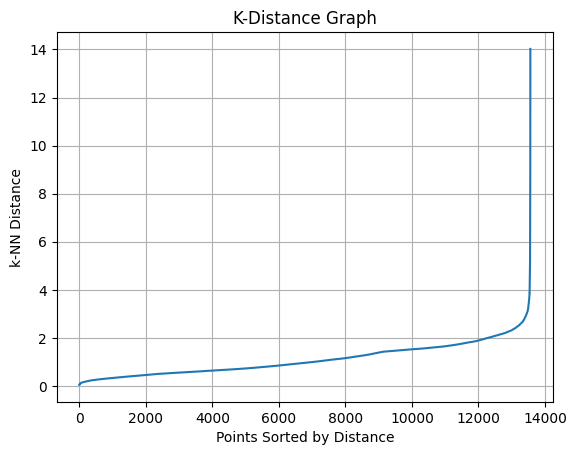

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=35)
model = knn.fit(X_rs)
distances, indices = knn.kneighbors(X_rs)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(axis='both')
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [22]:
db = DBSCAN(eps=3.8, min_samples=34).fit(X_rs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  1
Number of Outliers :  129


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_rs, labels)
print(score)

0.7256999075423051


Shows only 1 cluster. It doesnt solve the purpose. Hence will reduce the dimensions using PCA

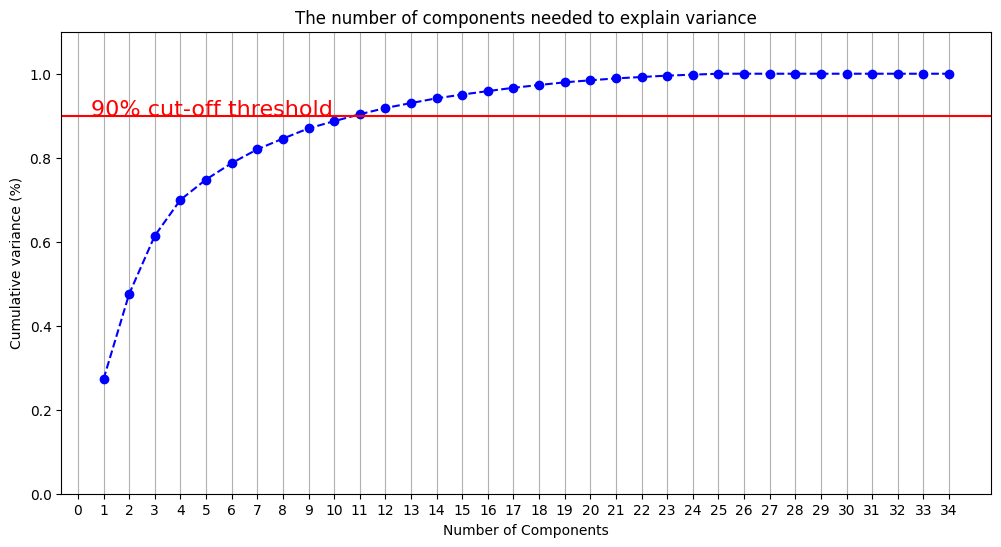

In [24]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_rs)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 35, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [31]:
pca=PCA(n_components=10)
pca.fit(X_rs)
test_pca=pca.transform(X_rs)

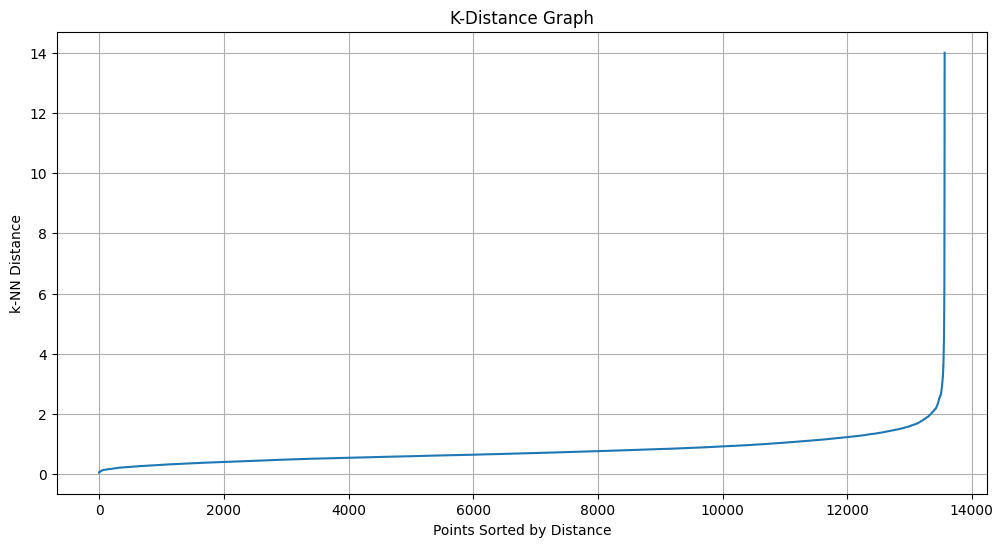

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=35)
model = knn.fit(test_pca)
distances, indices = knn.kneighbors(test_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(axis='both')
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [37]:
db = DBSCAN(eps=1.7, min_samples=11).fit(test_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  2
Number of Outliers :  968


In [38]:
from sklearn.metrics import silhouette_score
score = silhouette_score(test_pca, labels)
print(score)

0.49074201437556947


In [39]:
dtest['cluster']=db.labels_

In [40]:
dtest['cluster'].value_counts()

cluster
 0    12585
-1      968
 1       11
Name: count, dtype: int64

In [41]:
dtest[dtest['cluster']==1]

customer_age      job_type   marital  education default  balance  \
3313           52.0  professional  divorced   tertiary      no  12019.0   
3523           39.0  entrepreneur   married   tertiary      no  11532.0   
3997           47.0       service   married   tertiary      no  11801.0   
4447           35.0  professional    single   tertiary      no  11352.0   
5464           29.0    unemployed   married  secondary      no  11527.0   
6801           29.0  professional   married  secondary      no  10392.0   
6900           32.0       service   married   tertiary      no  12630.0   
7825           48.0  professional   married    primary      no  12516.0   
8677           43.0  professional   married   tertiary      no  13015.0   
9965           42.0       service   married   tertiary      no  12227.0   
12663          46.0       service  divorced   tertiary      no  10772.0   

      housing_loan personal_loan communication_type  day_of_month month  \
3313           yes            no           cellular            21    Q4   
3523           yes            no          telephone            25    Q3   
3997           yes            no            unknown            30    Q2   
4447           yes            no           cellular            20    Q4   
5464           yes            no           cellular            19    Q4   
6801           yes            no           cellular            20    Q4   
6900            no            no           cellular            20    Q4   
7825           yes            no            unknown            18    Q4   
8677           yes            no           cellular            21    Q4   
9965           yes            no           cellular            19    Q4   
12663          yes            no           cellular            16    Q1   

       last_contact_duration  num_contacts_in_campaign  \
3313                   249.0                       2.0   
3523                    45.0                       1.0   
3997                    72.0                       1.0   
4447                   174.0                       1.0   
5464                   182.0                       3.0   
6801                   111.0                       1.0   
6900                   119.0                       1.0   
7825                    51.0                       1.0   
8677                    49.0                       1.0   
9965                    37.0                       1.0   
12663                   97.0                       2.0   

       num_contacts_prev_campaign prev_campaign_outcome  cluster  
3313                            0               unknown        1  
3523                            0               unknown        1  
3997                            0               unknown        1  
4447                            0               unknown        1  
5464                            0               unknown        1  
6801                            0               unknown        1  
6900                            0               unknown        1  
7825                            0               unknown        1  
8677                            0               unknown        1  
9965                            0               unknown        1  
12663                           0               unknown        1

In [42]:
dtest.drop('cluster',axis=1,inplace=True)

DBSCAN with PCA and Robust Scaler reduced the dimensions to 10 and a silhouette score of 0.49 and 2 clusters

will try DBSCAN with MinMaxScaler as well

In [45]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
Xtest_mm=pd.DataFrame(MM.fit_transform(Xtest),columns=Xtest.columns)

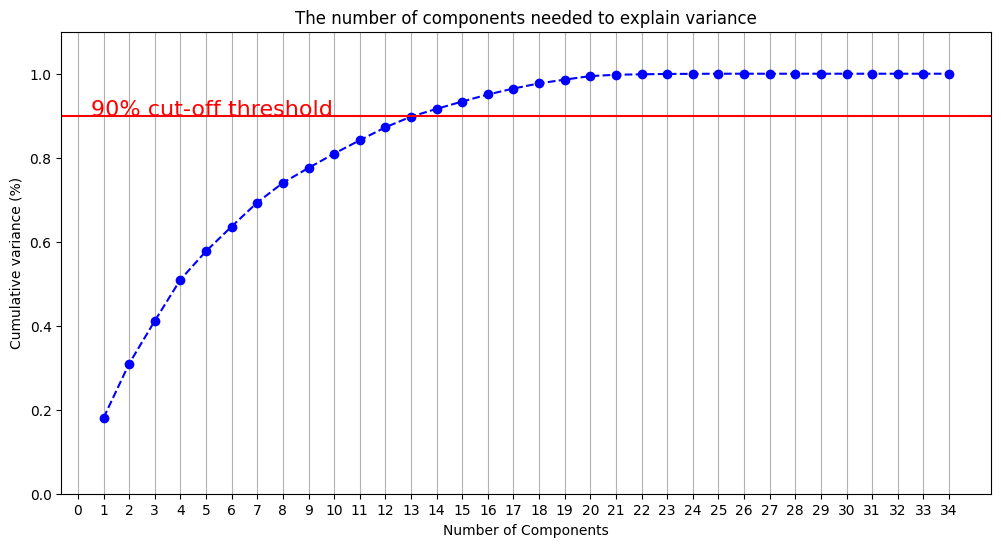

In [59]:
from sklearn.decomposition import PCA
pca=PCA().fit(Xtest_mm)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 35, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [60]:
pca=PCA(n_components=12)
pca.fit(Xtest_mm)
Xmm_pca=pca.transform(Xtest_mm)

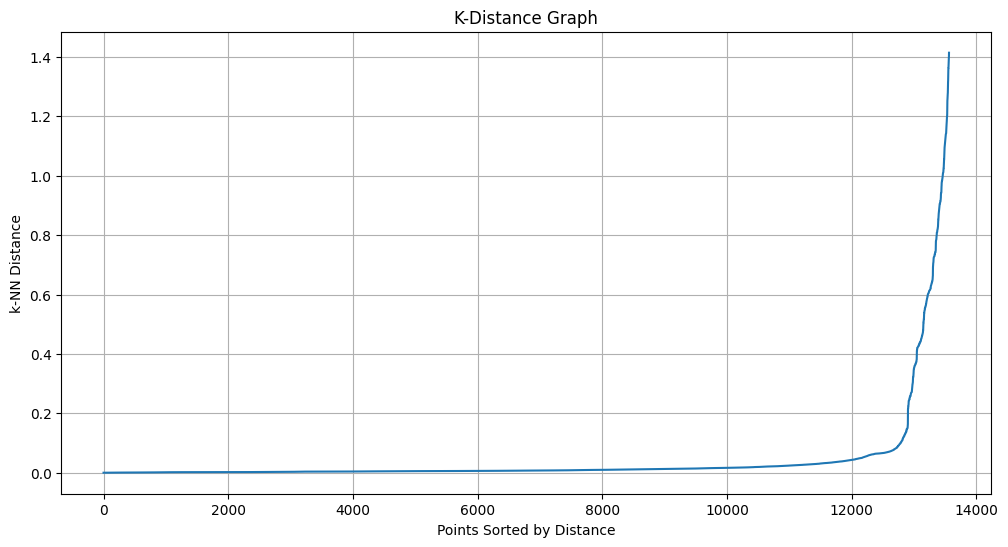

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=30)
model = knn.fit(Xmm_pca)
distances, indices = knn.kneighbors(Xmm_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid(axis='both')
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Graph');

In [78]:
db = DBSCAN(eps=0.25, min_samples=24).fit(Xmm_pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)

print('Number of Outliers : ', n_noise_)

Number of Clusters :  110
Number of Outliers :  5712


In [79]:
from sklearn.metrics import silhouette_score
score = silhouette_score(Xmm_pca, labels)
print(score)

0.3203814114649536


DBSCAN clustering with MinMax Scaler has not provided a favorable outcome in terms of clusters. Will try other clustering algorithms

KMeans Clustering

In [82]:
Xmm_pca

array([[ 1.36090989, -0.49456258, -0.51127514, ..., -0.14969064,
        -0.76269925, -0.26839003],
       [-0.59076271,  0.04444137,  0.98207298, ..., -0.23856401,
        -0.02058062, -0.48340035],
       [ 1.00952458,  1.07632355, -0.24138889, ...,  1.1087216 ,
         0.04426953, -0.12271045],
       ...,
       [-1.29117339, -1.06331461, -0.48354714, ..., -0.0081729 ,
         0.40096648,  0.07229688],
       [-0.50123577,  0.13692093,  0.42240105, ...,  0.18135461,
         0.1815614 ,  0.05941549],
       [ 0.30292882,  0.35270582,  0.14224883, ..., -0.00665164,
         0.09694477,  0.05230313]])

Text(0, 0.5, 'WCSS')

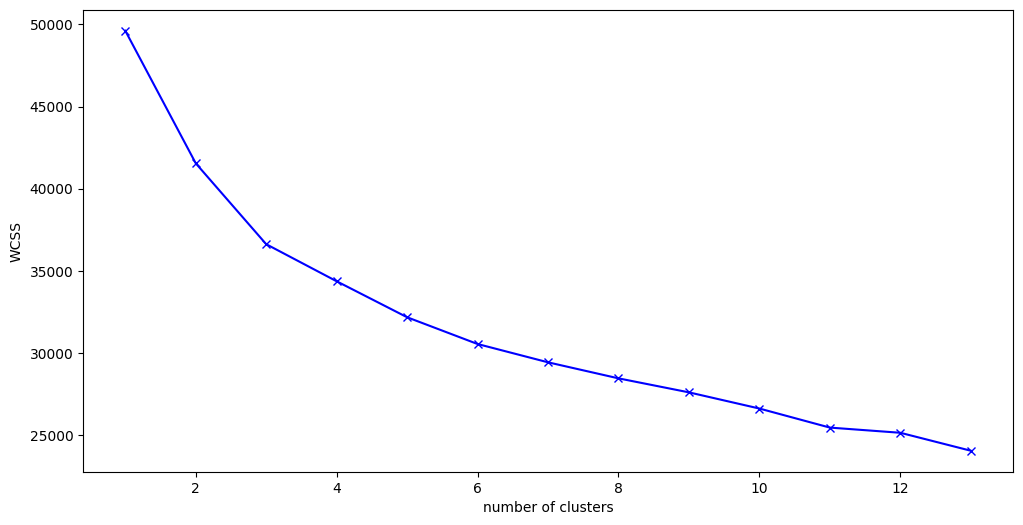

In [89]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(Xmm_pca)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,14),wcss,'bx-')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [90]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(Xmm_pca)
from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(Xmm_pca,y_kmeans)
silhouette_score_avg

0.16663575529961336

In [91]:
dtest['cluster']=kmeans.labels_

In [92]:
dtest['cluster'].value_counts()


cluster
0    5085
1    4608
2    3871
Name: count, dtype: int64

In [93]:
dtest.drop('cluster',axis=1,inplace=True)

DBSCAN has given 2 clusters in the test dataset with a score of 0.49. Whereas Kmeans with PCA has given 3 clusters with low silhouette score.